# <h1><center>**`Machinehack-ML-Merchandise-Popularity-Prediction`**</center></h1>


Aim -To predict the popularity from all the other datasets like Store_Ratio, Basket Ratio, Store Score. 

Big Brands spend a significant amount on popularizing a product.  Nevertheless, their efforts go in vain while establishing the merchandise in the hyperlocal market. Based on different geographical conditions same attributes can communicate a piece of much different information about the customer. Hence, insights this is a must for any brand owner.




Dataset link: https://www.kaggle.com/datasets/oossiiris/machinehack-ml-merchandise-popularity-prediction
Train.csv - 18208 x 12  (Includes popularity Column as Target variable)

Test.csv - 12140 x 11 

### `COLUMNS IN THE DATASET`

storeratio

 basketratio

category1

 storescore

category2

 storepresence

score1 

score2

score3 

score4

time

popularity (Target Column)

# `Importing required libraries`

In [2]:
# Importing all necessary libraries
import seaborn as sns
import numpy as np
from sklearn.metrics import log_loss
import pandas as pd
from scipy.stats import skew,kurtosis,zscore
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from matplotlib import pylab
from pylab import *
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [3]:
# Loading the dataset using pandas
train_df = pd.read_csv('/content/Train.csv')
test_df = pd.read_csv('/content/Test.csv')

In [4]:
# printing train head

train_df.head()


,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [5]:
# printing test head

test_df.head()


,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,-23.718,0,0.12400,0.99100,0.7890,0.00001,127.602,236436
1,0.586,0.636,4,-7.710,1,0.00208,0.32200,0.1070,0.35500,136.337,253631
2,0.457,0.743,0,-7.591,1,0.40400,0.00931,0.2010,0.68800,154.902,215669
3,0.423,0.748,5,-9.832,1,0.03000,0.22100,0.1690,0.42800,93.977,325200
4,0.802,0.756,2,-10.791,0,0.08430,0.00765,0.0521,0.96300,131.715,288293


In [6]:
# Making a copy of the dataset 
df = train_df



# Identifying the number of features or columns

In [7]:
# Checking the shape of train dataset

train_df.shape



(18208, 12)

In [8]:
# Checking the shape of test dataset

test_df.shape



(12140, 11)

# Names of the columns

In [9]:
# Check the columns in the train dataset

train_df.columns



Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time', 'popularity'],
      dtype='object')

# Information about the dataset

In [10]:
# Checking which columns have categorical, numerical or boolean values in the train dataset


train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


After checking the Dtypes of all the columns

object - String values

float64 - Numerical values

Observation: There are no String values so there are no categorical data

In [11]:
# Checking which columns have categorical, numerical or boolean values in the test dataset


test_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     12140 non-null  float64
 1   Basket_Ratio    12140 non-null  float64
 2   Category_1      12140 non-null  int64  
 3   Store_Score     12140 non-null  float64
 4   Category_2      12140 non-null  int64  
 5   Store_Presence  12140 non-null  float64
 6   Score_1         12140 non-null  float64
 7   Score_2         12140 non-null  float64
 8   Score_3         12140 non-null  float64
 9   Score_4         12140 non-null  float64
 10  time            12140 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.0 MB


After checking the Dtypes of all the columns

object - String values

float64 - Numerical values

Observation: There are no String values so there are no categorical data

In [12]:
# More information in the train dataset like the total count,min, max values in all the columns


train_df.describe()



,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
count,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,1.820800e+04,18208.000000
mean,0.544283,0.483585,5.155536,-12.198086,0.648506,0.477702,0.322109,0.164888,0.421440,115.305776,2.180101e+05,3.850231
std,0.202709,0.302010,3.535068,8.370566,0.477450,0.380634,0.413493,0.136531,0.271922,31.478303,9.648289e+04,0.544226
min,0.000000,0.000216,0.000000,-47.576000,0.000000,0.000000,0.000000,0.011900,0.000000,0.000000,3.184400e+04,0.000000
25%,0.411000,0.200000,2.000000,-16.496250,0.000000,0.086175,0.000001,0.095300,0.184750,90.974250,1.696202e+05,4.000000
50%,0.573000,0.517000,5.000000,-9.166500,1.000000,0.430000,0.002245,0.112000,0.393000,114.022500,2.046460e+05,4.000000
75%,0.699000,0.742000,8.000000,-5.943750,1.000000,0.895000,0.859000,0.176000,0.640000,134.997000,2.471562e+05,4.000000
max,0.998000,1.000000,11.000000,-0.079000,1.000000,0.996000,1.000000,0.991000,0.999000,219.701000,3.908467e+06,5.000000


In [13]:
test_df.describe()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
count,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,1.214000e+04
mean,0.543776,0.488879,5.121417,-12.062847,0.642916,0.474675,0.321641,0.165942,0.420485,115.748041,2.154031e+05
std,0.200109,0.301217,3.528765,8.300385,0.479160,0.377582,0.414438,0.139109,0.270508,31.519999,8.231108e+04
min,0.000000,0.000000,0.000000,-46.847000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.406700e+04
25%,0.414750,0.213000,2.000000,-16.066000,0.000000,0.087775,0.000001,0.095900,0.190000,90.908750,1.700000e+05
50%,0.570000,0.521000,5.000000,-9.046500,1.000000,0.430500,0.002050,0.112000,0.392000,114.618500,2.043415e+05
75%,0.696000,0.745000,8.000000,-5.891750,1.000000,0.882000,0.861000,0.173250,0.633000,135.829250,2.445222e+05
max,0.978000,1.000000,11.000000,0.662000,1.000000,0.996000,1.000000,0.994000,1.000000,219.701000,1.782178e+06


In [14]:
# checking the length of test and train dataset

print('train data length:',len(train_df))
print('test data length:',len(test_df))

train data length: 18208
test data length: 12140


In [15]:
# Checking missing values in all the columnns of the train dataset


train_df.isnull().sum()


Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

In [16]:
# Checking missing values in all the columnns of the test dataset

test_df.isnull().sum()


Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
dtype: int64

In [17]:
# Unique values in train dataset


train_df.nunique()



Store_Ratio        1053
Basket_Ratio       1993
Category_1           12
Store_Score       10758
Category_2            2
Store_Presence     2832
Score_1            3668
Score_2            1385
Score_3            1591
Score_4           12943
time              12755
popularity            5
dtype: int64

In [18]:
# Unique values in test dataset

test_df.nunique()


Store_Ratio       1010
Basket_Ratio      1811
Category_1          12
Store_Score       8300
Category_2           2
Store_Presence    2507
Score_1           3064
Score_2           1275
Score_3           1491
Score_4           9463
time              9301
dtype: int64

# EDA

In [19]:
#producing correlation matrix using pandas
corr = train_df.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
Store_Ratio,1.00,0.47,0.04,0.60,-0.10,-0.47,-0.45,-0.04,0.62,0.12,-0.06,0.23
Basket_Ratio,0.47,1.00,0.05,0.83,-0.11,-0.82,-0.61,0.28,0.53,0.25,0.10,0.20
Category_1,0.04,0.05,1.00,0.04,-0.14,-0.05,-0.03,0.02,0.04,0.00,-0.01,0.00
Store_Score,0.60,0.83,0.04,1.00,-0.09,-0.72,-0.73,0.15,0.52,0.26,0.08,0.20
Category_2,-0.10,-0.11,-0.14,-0.09,1.00,0.10,0.02,-0.04,-0.04,-0.05,-0.01,-0.03
Store_Presence,-0.47,-0.82,-0.05,-0.72,0.10,1.00,0.57,-0.19,-0.43,-0.22,-0.07,-0.20
Score_1,-0.45,-0.61,-0.03,-0.73,0.02,0.57,1.00,-0.10,-0.47,-0.20,-0.11,-0.16
Score_2,-0.04,0.28,0.02,0.15,-0.04,-0.19,-0.10,1.00,0.03,0.02,-0.00,0.00
Score_3,0.62,0.53,0.04,0.52,-0.04,-0.43,-0.47,0.03,1.00,0.18,0.01,0.18
Score_4,0.12,0.25,0.00,0.26,-0.05,-0.22,-0.20,0.02,0.18,1.00,0.03,0.04


** Observations from above correlation matrix**

1. store ratio is strongly correlated with basket ratio , store score, score3 ,store presence score1 , score3
2. basket ratio is correlatd to store score, store presence, score1 score3.
3. category1 is correlated with category2
4. score presence is correlated with score1, score2, score3, popularity
5. score1 is correlated with score3 , score4, time, popularity


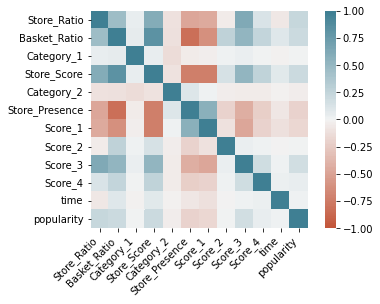

In [20]:
# Using seaborn
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap= sns.diverging_palette(20,220, n=200), square=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation =45, horizontalalignment = 'right');



# HISTOGRAM


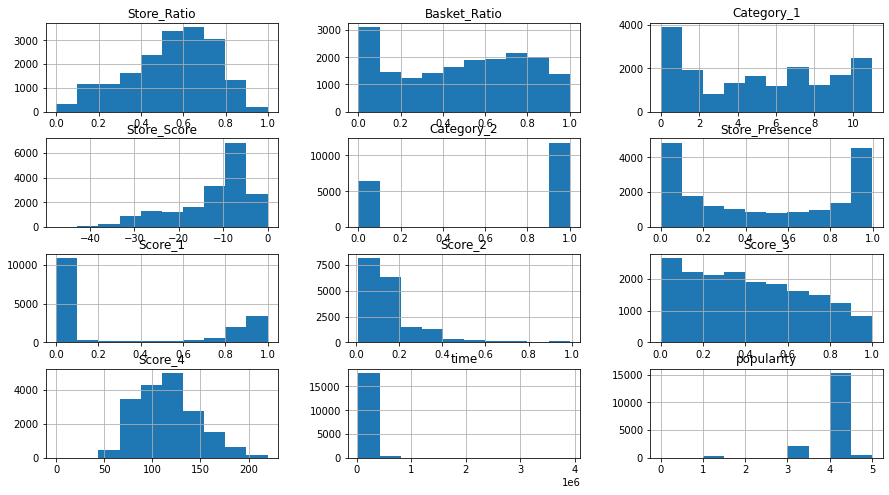

In [21]:
train_df.hist(figsize=(15,8));


**observation from above histogram**
1. The data distribution of store presence is bimodal
2. Score_2, score 1, score3 and time data distribution is skewed left.
3. Store score and popularity data distribution is skewed right.
4. distribution of basket ratio, carwgort 1  is multimodal.
5. distribution of store eatio is bimodal and skewed



# VIF - Variance inflation factor

In [22]:
#importing statsmodel.api

import statsmodels.api as sm

In [23]:
# creating a dataframe of just numerical values
train_for_vif = train_df.drop(columns=['popularity'])


# target values
target = train_df['popularity']


# numerical values column names
names = ['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score', 'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'time']


#printing names

names


['Store_Ratio',
 'Basket_Ratio',
 'Category_1',
 'Store_Score',
 'Category_2',
 'Store_Presence',
 'Score_1',
 'Score_2',
 'Score_3',
 'Score_4',
 'time']

In [24]:
# dropping rows with from new dataframe empty cells

train_for_vif.columns == names[1]


array([False,  True, False, False, False, False, False, False, False,
       False, False])

In [25]:
# Calculating VIF for each feature.

for i in range(0, len(names)):
  y = train_for_vif.loc[:, train_for_vif.columns==names[i]]
  
  x = train_for_vif.loc[:, train_for_vif.columns!=names[i]]
  
  model = sm.OLS(y,x)
  
  results = model.fit()
  
  rsq = results.rsquared
  
  vif = round(1/(1-rsq),2)
  
  print("R Square value of {} columns is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))
  

R Square value of Store_Ratio columns is 0.91 keeping all other columns as features
Variance inflation Factor of Store_Ratio columns is 11.74 

R Square value of Basket_Ratio columns is 0.92 keeping all other columns as features
Variance inflation Factor of Basket_Ratio columns is 12.13 

R Square value of Category_1 columns is 0.68 keeping all other columns as features
Variance inflation Factor of Category_1 columns is 3.11 

R Square value of Store_Score columns is 0.9 keeping all other columns as features
Variance inflation Factor of Store_Score columns is 9.87 

R Square value of Category_2 columns is 0.65 keeping all other columns as features
Variance inflation Factor of Category_2 columns is 2.83 

R Square value of Store_Presence columns is 0.85 keeping all other columns as features
Variance inflation Factor of Store_Presence columns is 6.69 

R Square value of Score_1 columns is 0.72 keeping all other columns as features
Variance inflation Factor of Score_1 columns is 3.59 

R 

Observations:

there is colinearity/multicolinearity between variables as the VIF value is almost upto 2.5

Store_Ratio, Basket_Ratio, Category_1, Store_Score, Category_2, Store_Presence, Score_1, Score_2, Score_3, Score_4, time they all have colinearity with all the variables.

# BOX PLOT

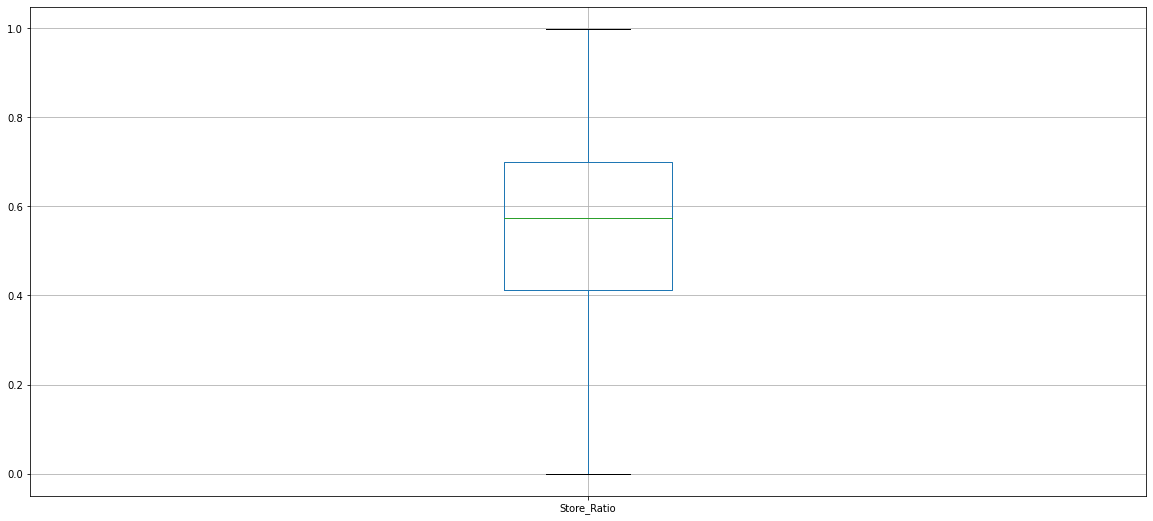

In [26]:
# Performing a box plot on Store_Ratio 

train_df.boxplot(column='Store_Ratio', figsize=(20,9))



from above box plot graph:

Store ratio

1. 25% of  store ratio have value between range 0 to 0.4.

2. 25% of store ratio have value between range 0.4 to 0.6.
3. 25% of store ratio have value between range 0.6 to 0.7.
4. 25% of store ratio have value between range 0.7 to 1.

The mean store ratio is around 6.

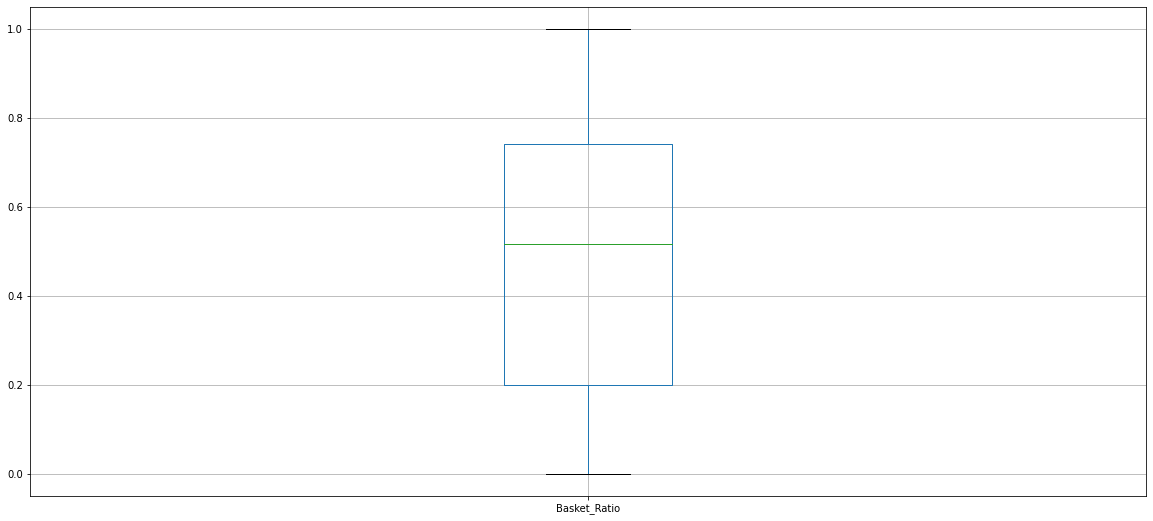

In [27]:
# Performing a box plot on Basket_Ratio 

train_df.boxplot(column='Basket_Ratio', figsize=(20,9))


from above box plot graph:

basket ratio

1. 25% of  basket ratio have value between range 0 to 0.2.
2. 25% of basket ratio have value between range 0.4 to 0.52
3. 25% of basket ratio have value between range 0.52 to 0.78.
4. 25% of basket ratio have value between range 0.78 to 1.

The mean basket ratio is around 0.52

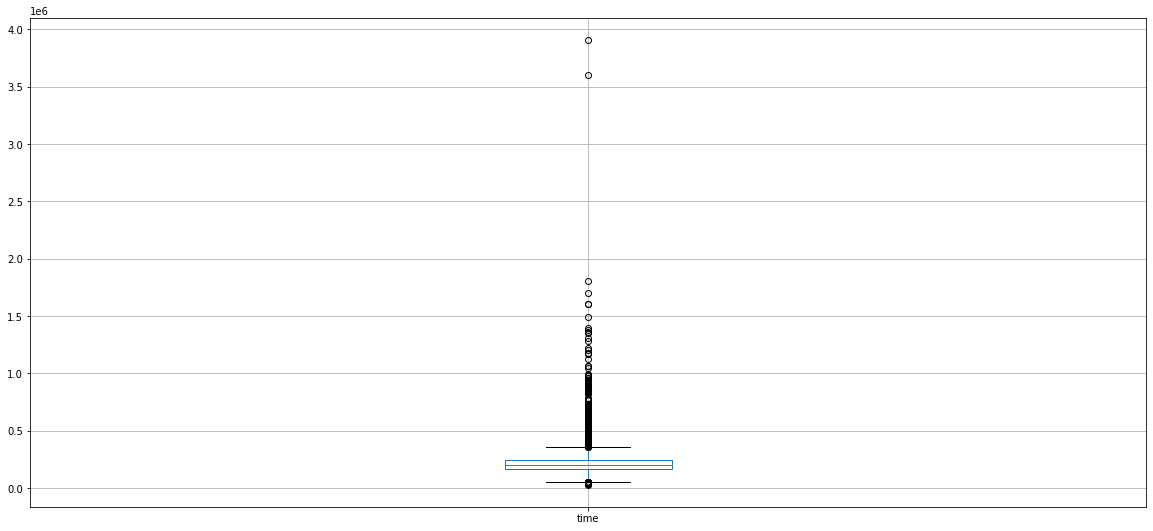

In [28]:
# Performing a box plot on time

train_df.boxplot(column='time', figsize=(20,9))



from above box plot graph:

time

1. 25% of  time have value between range 0 to 0.2.

2. 25% of time have value between range 0.2 to 0.25
3. 25% of time have value between range 0.25 to 0.3.
4. 25% of time have value between range 0.3 to 0.4

The mean time is around 0.25

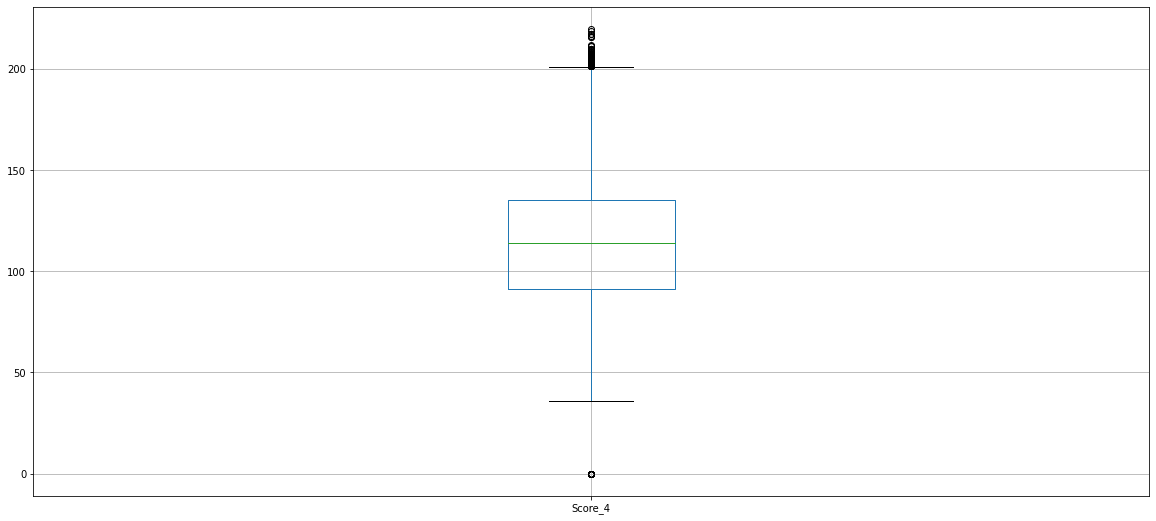

In [29]:
# Performing a box plot on Score_4 


train_df.boxplot(column='Score_4', figsize=(20,9))



from above box plot graph:

score 4

1. 25% of  score 4 have value between range 40 to 90.

2. 25% of score 4 have value between range 90 to 125
3. 25% of score 4 have value between range 125 to 140.
4. 25% of score 4 have value between range 140 to 200.

The mean score 4 is around 125

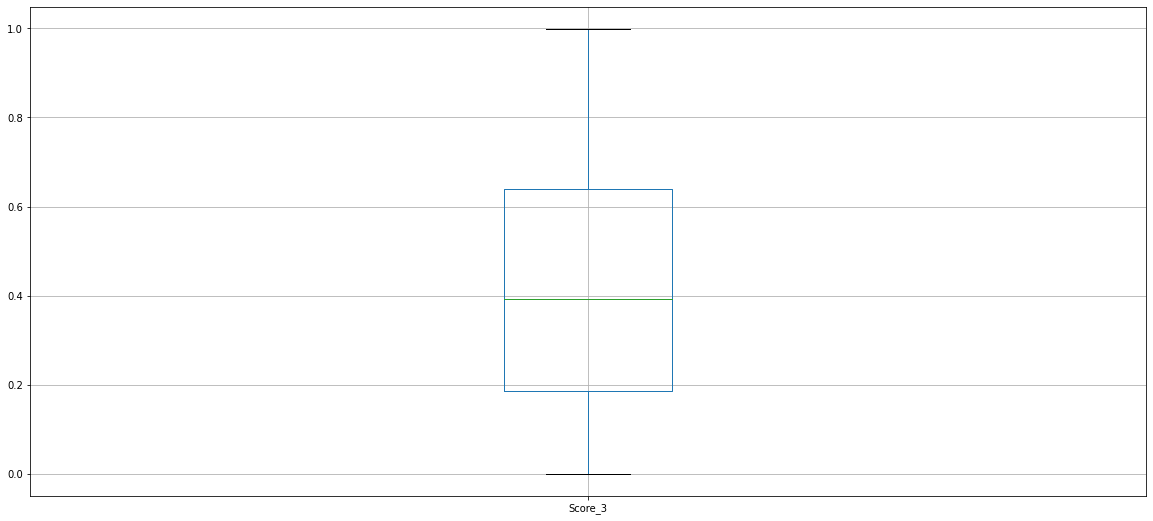

In [30]:
# Performing a box plot on Score_3 

train_df.boxplot(column='Score_3', figsize=(20,9))


from above box plot graph:

score3

1. 25% of  score3 have value between range 0 to 0.2.

2. 25% of score3 have value between range 0.2 to 0.4
3. 25% of score3 have value between range 0.4 to 0.62.
4. 25% of score3 have value between range 0.62 to 1.

The mean score3 is around 0.4

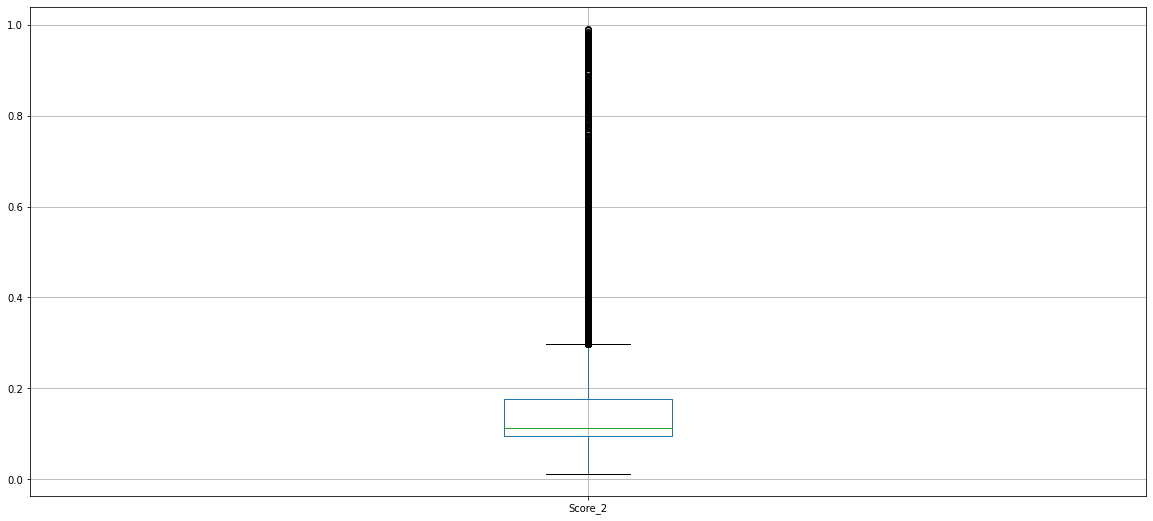

In [31]:
# Performing a box plot on Score_2 

train_df.boxplot(column='Score_2', figsize=(20,9))


from above box plot graph:

score2

1. 25% of  score2 have value between range 0 to 0.1.

2. 25% of score2 have value between range 0.1 to 0.12
3. 25% of score2 have value between range 0.12 to 0.18.
4. 25% of score2 have value between range 0.18 to 1.

The mean score2 is around 0.12

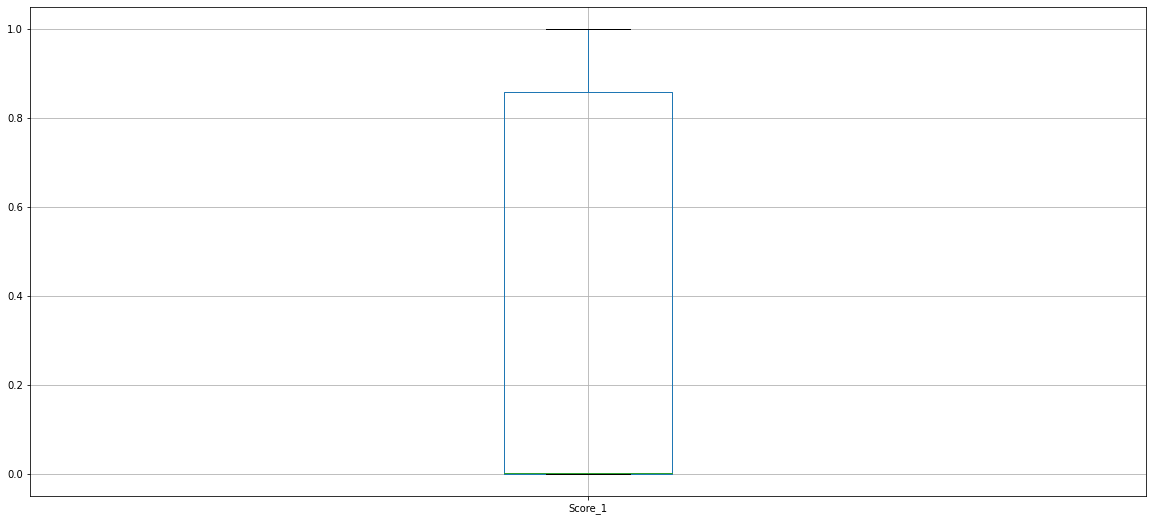

In [32]:
# Performing a box plot on Score_1 

train_df.boxplot(column='Score_1', figsize=(20,9))


from above box plot graph:

score1

1. 25% of  score1 have value between range 0 to 0.0.

2. 25% of score1 have value between range 0.0 to 0.0
3. 25% of score1 have value between range 0.0 to 0.9
4. 25% of score1 have value between range 0.9 to 1.

The mean score1 is around 0.0

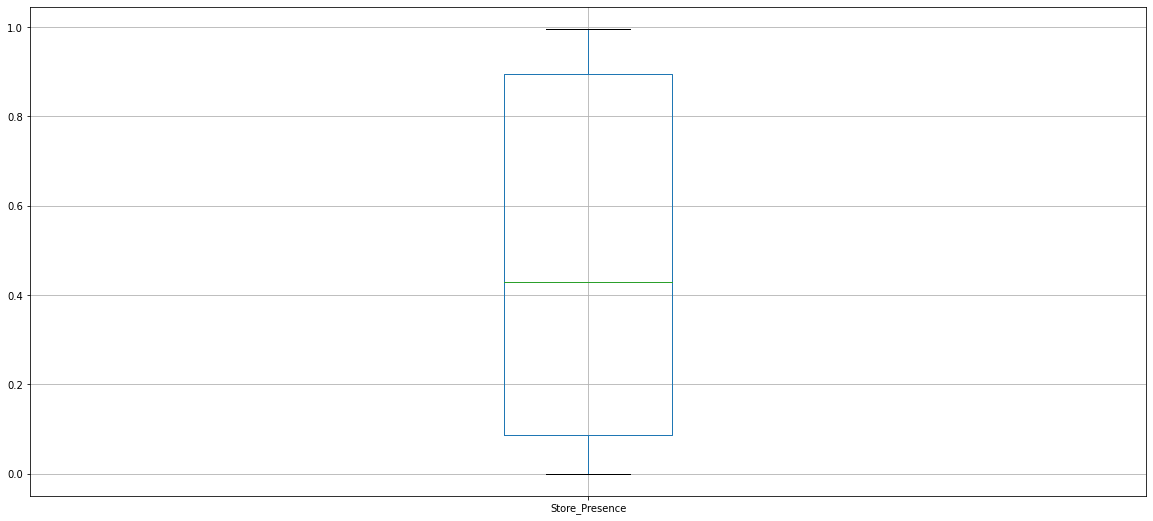

In [33]:
# Performing a box plot on Store_Presence 

train_df.boxplot(column='Store_Presence', figsize=(20,9))


from above box plot graph:

store presence

1. 25% of  store presence have value between range 0 to 0.35.

2. 25% of store presence have value between range 0.35 to 0.42
3. 25% of store presence have value between range 0.42 to 0.95.
4. 25% of store presence have value between range 0.95 to 1.

The mean store presence is around 0.42

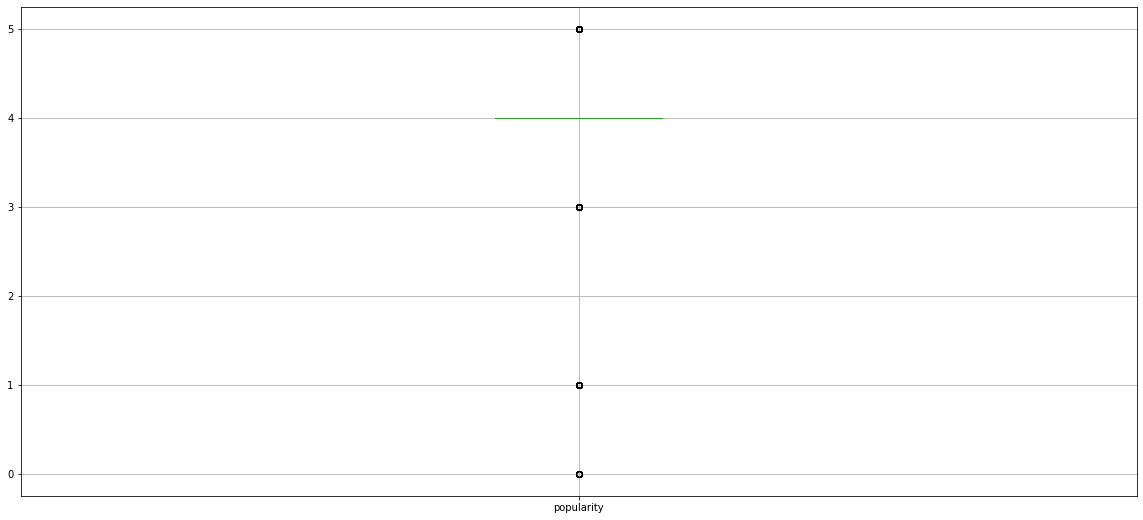

In [34]:
# Performing a box plot on popularity

train_df.boxplot(column='popularity', figsize=(20,9))


# COUNT PLOT


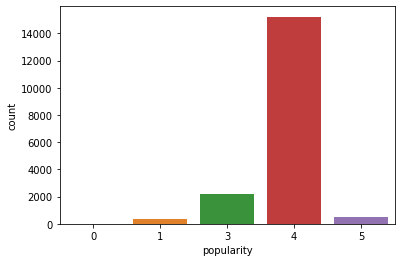

In [35]:
# Countplot on popularity

sns.countplot(df.popularity)


From above count plot

we can observe that the dataset is imbalanced.

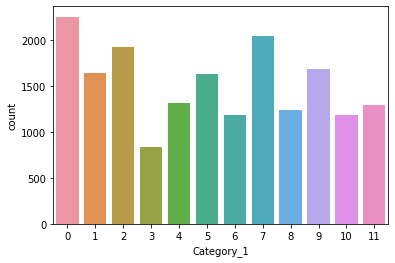

In [36]:
# Countplot on  Category_1

sns.countplot(df.Category_1)


distribution of values over complete dataset is multimodal

# Point PLOT

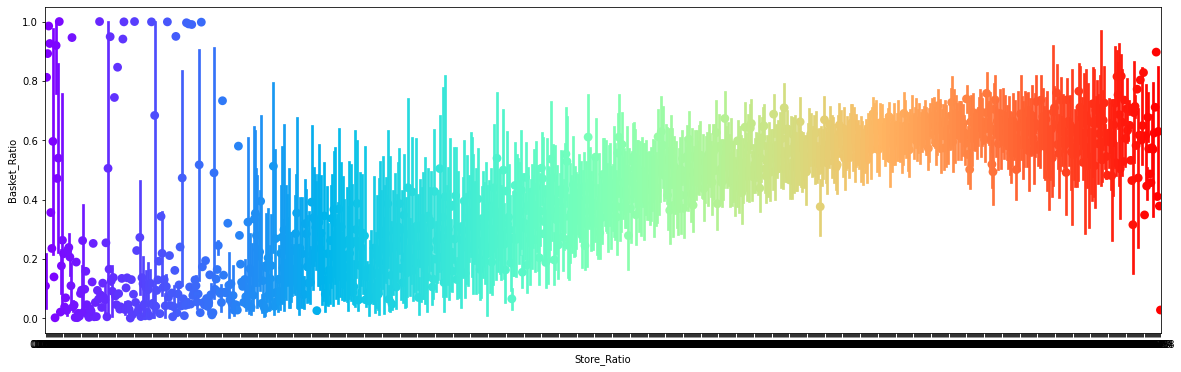

In [37]:
# Point plot between Store_Ratio and Basket_Ratio

plt.figure(figsize=(20,6))

sns.pointplot(x='Store_Ratio', y ='Basket_Ratio', data=train_df, palette='rainbow')


From above point plot

There is a increase in basket ratio when there is a increase in store ratio. That is both are correlated

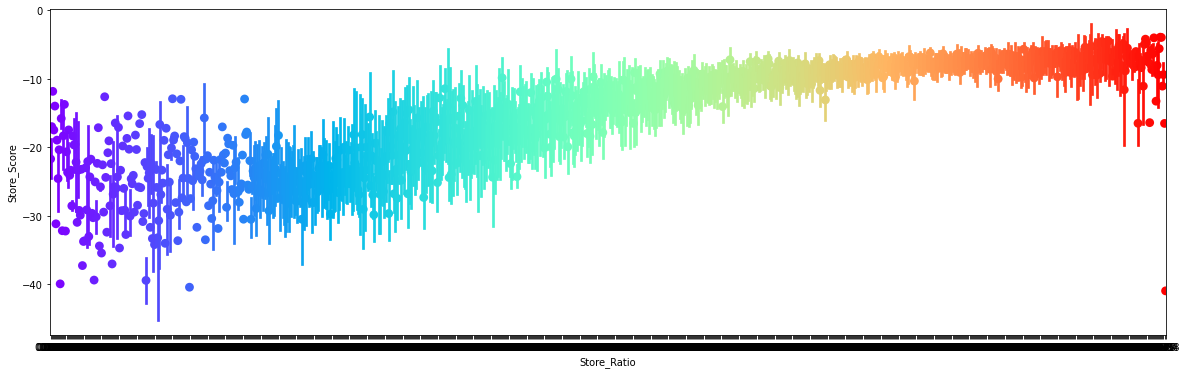

In [38]:
# Point plot between Store_Ratio and Store_Score

plt.figure(figsize=(20,6))

sns.pointplot(x='Store_Ratio', y ='Store_Score', data=train_df, palette='rainbow')


From above point plot

There is a increase in store score when there is a increase in store ratio. That is both are correlated

increase decrease increase decrease

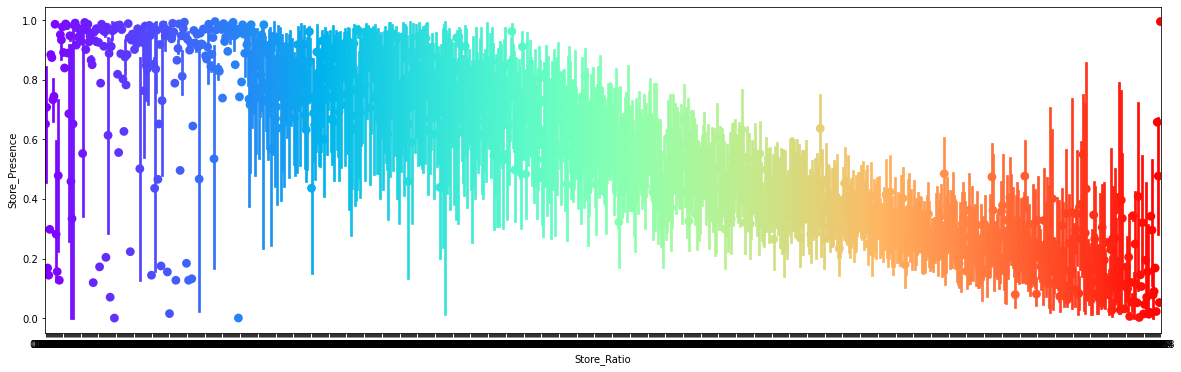

In [39]:
# Point plot between Store_Ratio and Store_Presence

plt.figure(figsize=(20,6))

sns.pointplot(x='Store_Ratio', y ='Store_Presence', data=train_df, palette='rainbow')


From above point plot

There is a increase in store ratio when there is a decrease in store presence.

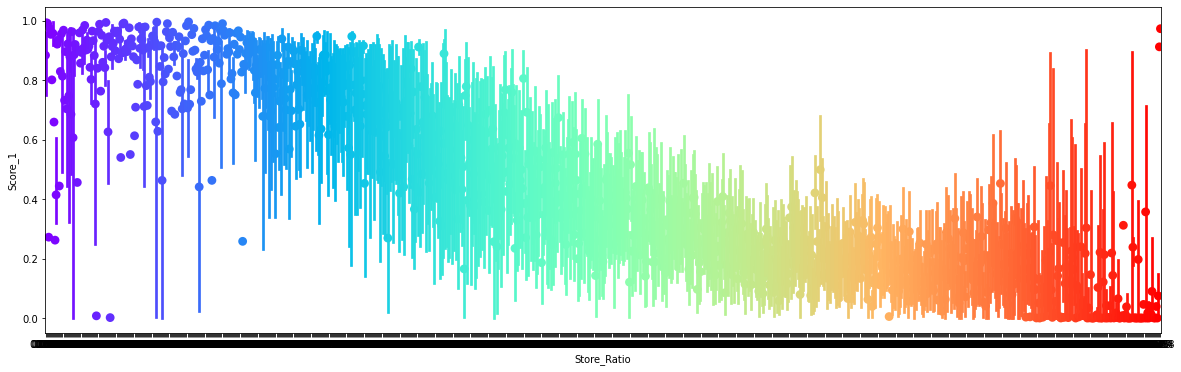

In [40]:
# Point plot between Store_Ratio and Score_1

plt.figure(figsize=(20,6))

sns.pointplot(x='Store_Ratio', y ='Score_1', data=train_df, palette='rainbow')


From above point plot

There is a decrease in score3 when there is a increase in store ratio.

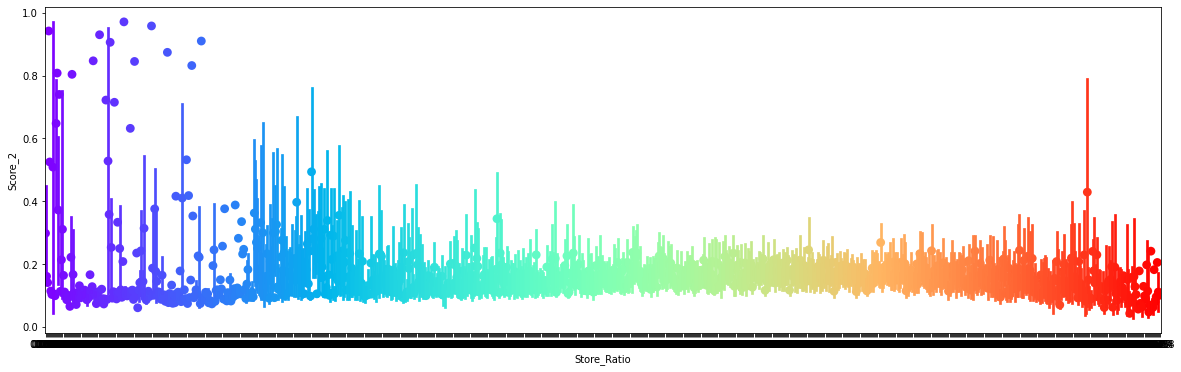

In [41]:
# Point plot between Store_Ratio and Score_2 

plt.figure(figsize=(20,6))

sns.pointplot(x='Store_Ratio', y ='Score_2', data=train_df, palette='rainbow')


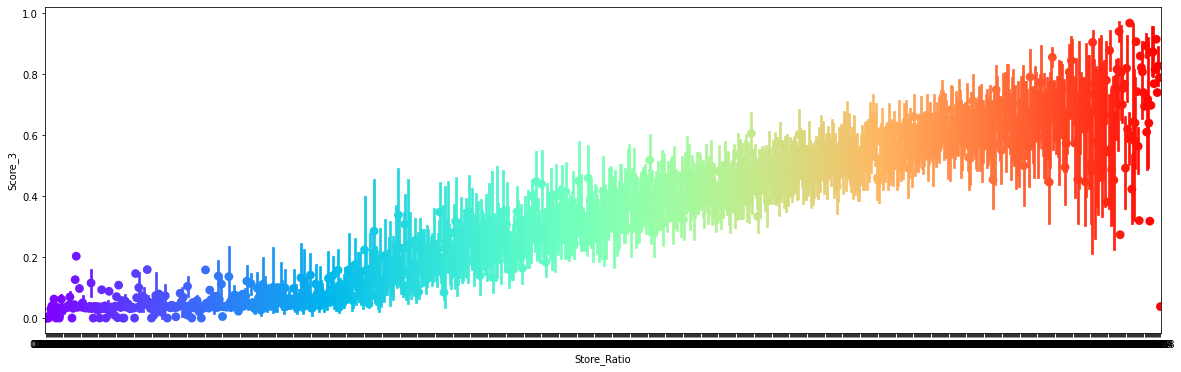

In [42]:
# Point plot between Store_ratio and Score_3

plt.figure(figsize=(20,6))

sns.pointplot(x='Store_Ratio', y ='Score_3', data=train_df, palette='rainbow')


From above point plot

There is a increase in store ratio when there is a increase in score3. That is both are correlated

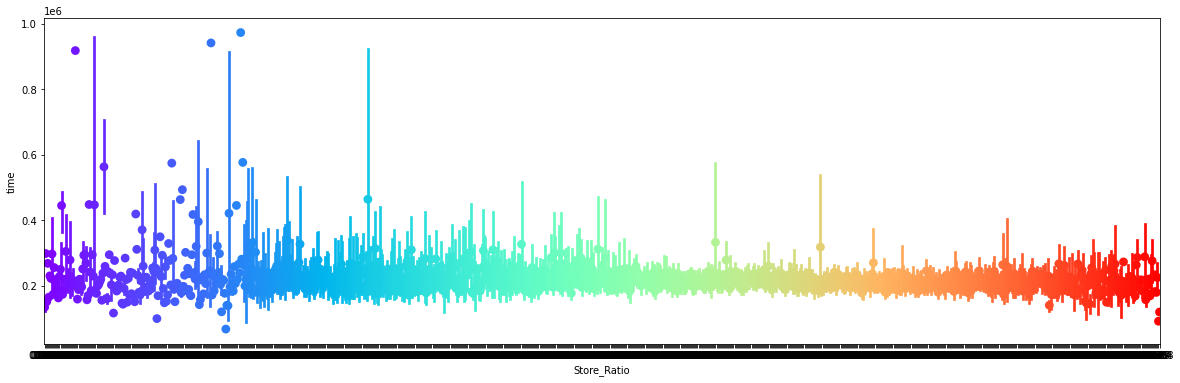

In [43]:
# Point plot between Store_Ratio and time

plt.figure(figsize=(20,6))

sns.pointplot(x='Store_Ratio', y ='time', data=train_df, palette='rainbow')


From above pointplot

1. Most of the points are between 0.2 to 0.3
2. Very few points above 0.3

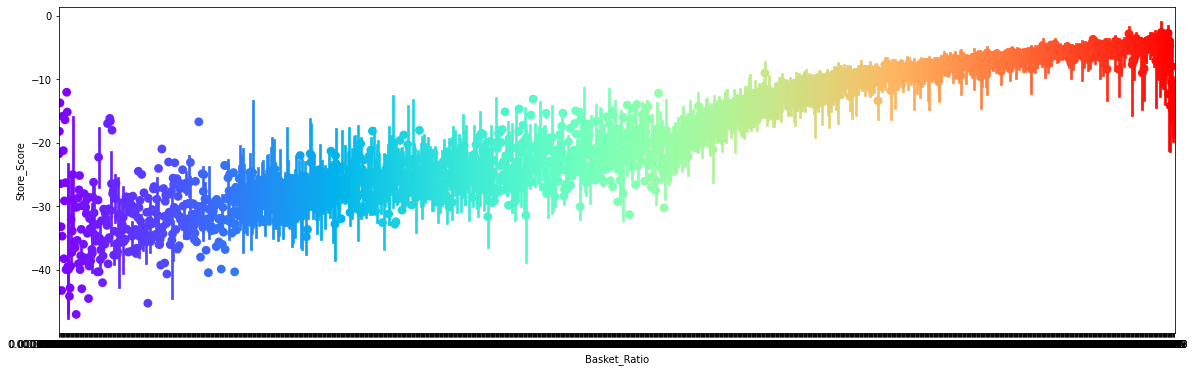

In [44]:
# Point plot between Basket_Ratio and Store_Score

plt.figure(figsize=(20,6))

sns.pointplot(x='Basket_Ratio', y ='Store_Score', data=train_df, palette='rainbow')


From above point plot

There is a increase in store score when there is a increase in basket ratio. 

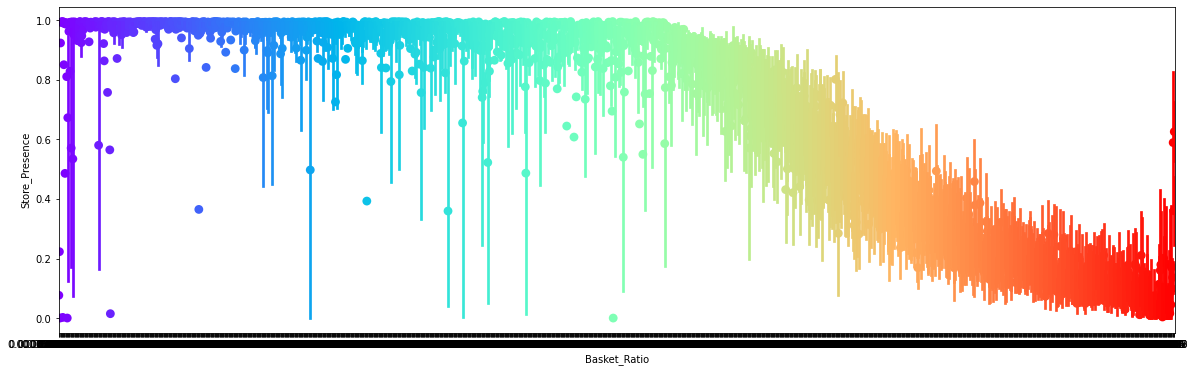

In [45]:
# Point plot between Basket_Ratio and Store_Presence

plt.figure(figsize=(20,6))

sns.pointplot(x='Basket_Ratio', y ='Store_Presence', data=train_df, palette='rainbow')


observation from above point plot 

there is decrease in value on store presence as value of basket ratio is increasing

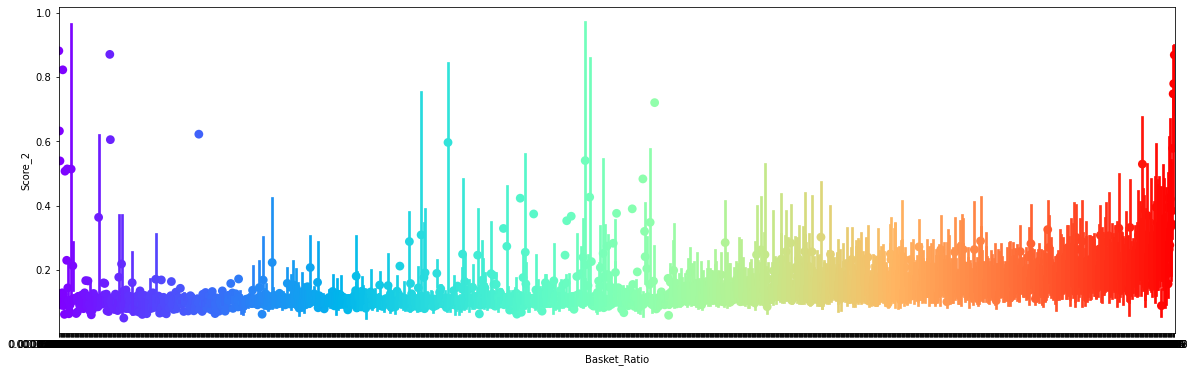

In [46]:
# Point plot between Basket_Ratio and Score_2

plt.figure(figsize=(20,6))

sns.pointplot(x='Basket_Ratio', y ='Score_2', data=train_df, palette='rainbow')


From above pointplot

1. Most of the points are between 0.0 to 0.2
2. Very few points above 0.2

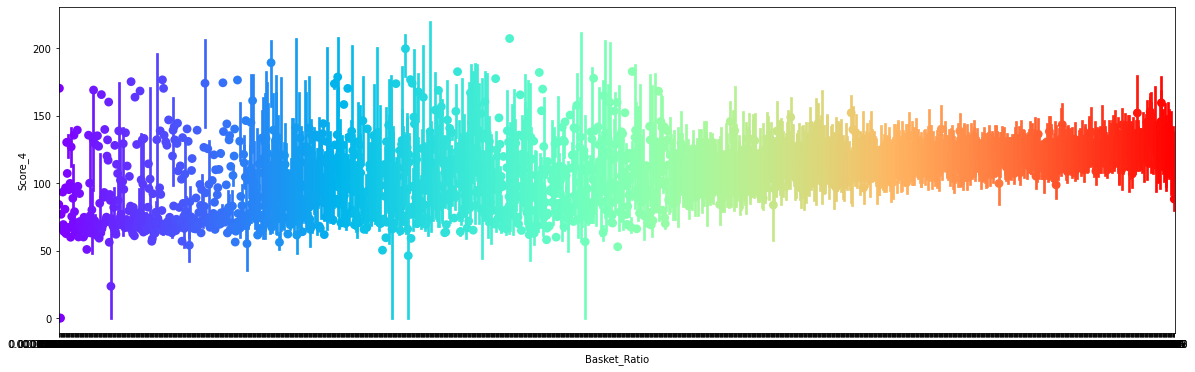

In [47]:
# Point plot between Basket_Ratio and Score_4

plt.figure(figsize=(20,6))

sns.pointplot(x='Basket_Ratio', y ='Score_4', data=train_df, palette='rainbow')


From above pointplot

Most of the points are between 50 to 150

Very few points above 150 and below 50

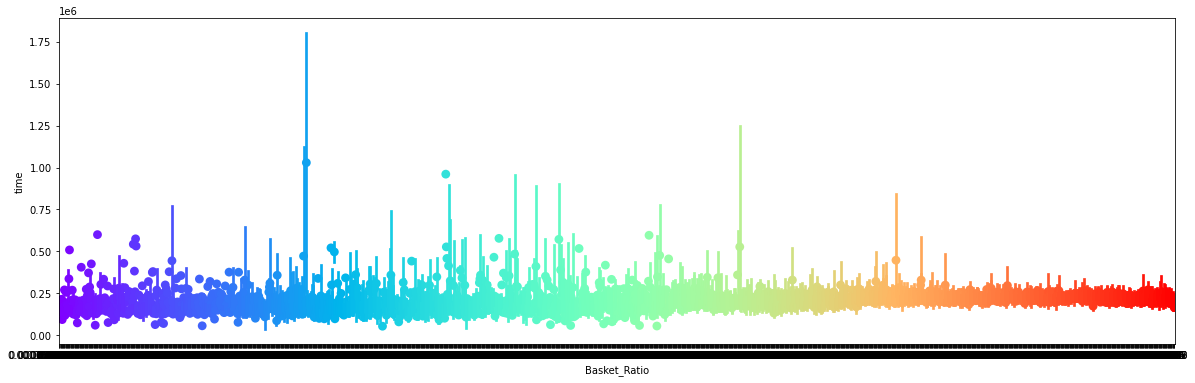

In [48]:
# Point plot between Basket_Ratio and time

plt.figure(figsize=(20,6))

sns.pointplot(x='Basket_Ratio', y ='time', data=train_df, palette='rainbow')


From above pointplot

Most of the points are between 0.0 to 0.50

Very few points above 0.50



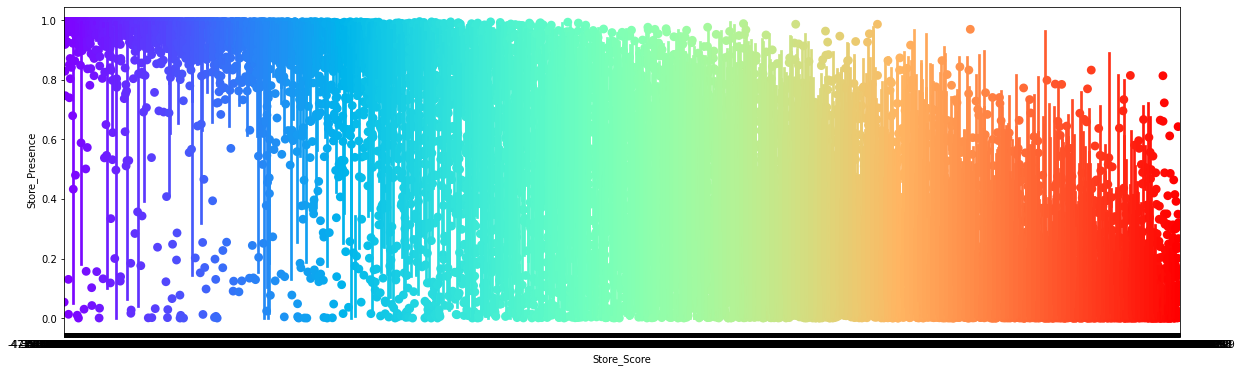

In [49]:
# Point plot between Store_Score and Store_Presence

plt.figure(figsize=(20,6))

sns.pointplot(x='Store_Score', y ='Store_Presence', data=train_df, palette='rainbow')


as the value of store score increasing value of store presence decreasing

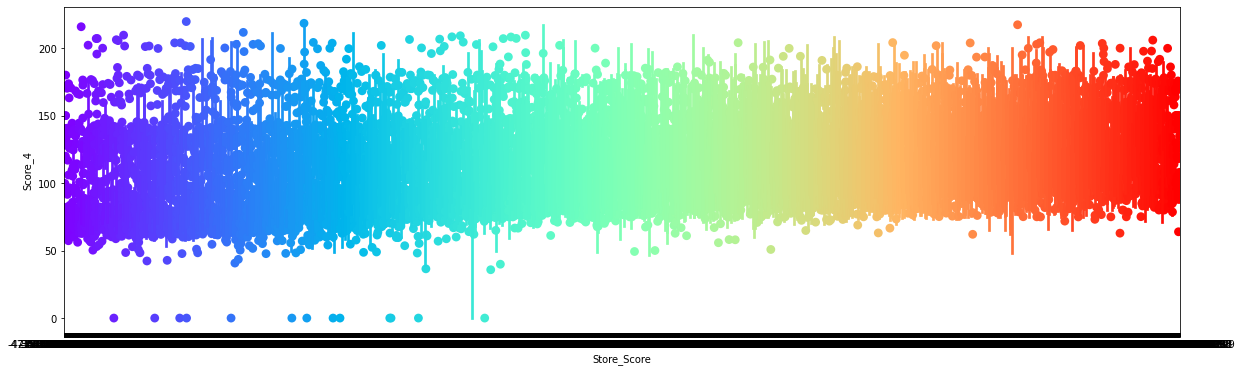

In [50]:
# Point plot between Store_Score and Score_4 

plt.figure(figsize=(20,6))

sns.pointplot(x='Store_Score', y ='Score_4', data=train_df, palette='rainbow')



From above pointplot

Most of the points are between 50 to 200

Very few points above 200 and below 50

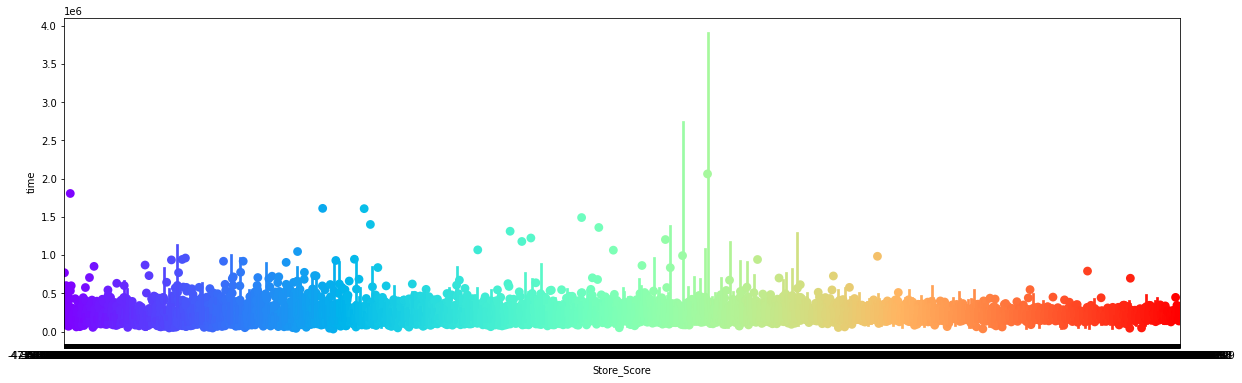

In [51]:
# Point plot between Store_Score and time

plt.figure(figsize=(20,6))

sns.pointplot(x='Store_Score', y ='time', data=train_df, palette='rainbow')


From above pointplot

Most of the points are between 0.0 and 0.5

Very few points above 0.5

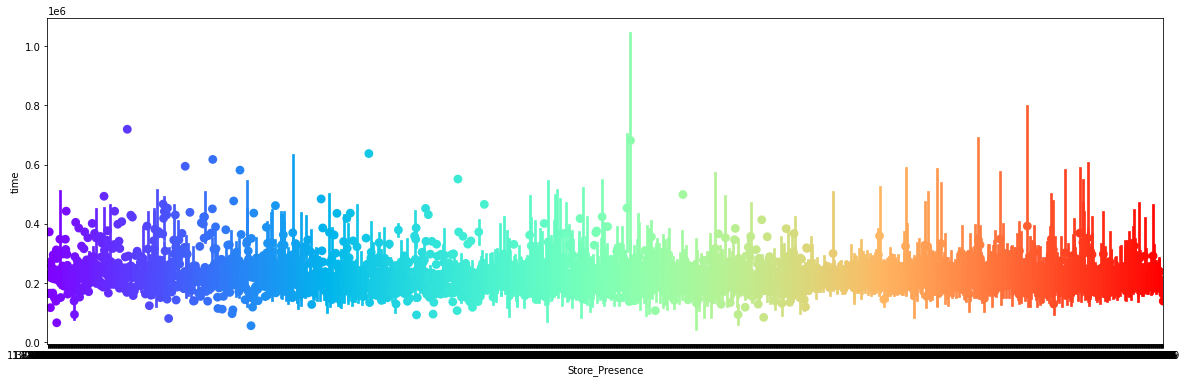

In [52]:
# Point plot between Store_Presence and time

plt.figure(figsize=(20,6))

sns.pointplot(x='Store_Presence', y ='time', data=train_df, palette='rainbow')


From above pointplot

Most of the points are between 0.1 and 0.4

Very few points above 0.4 and below 0,1

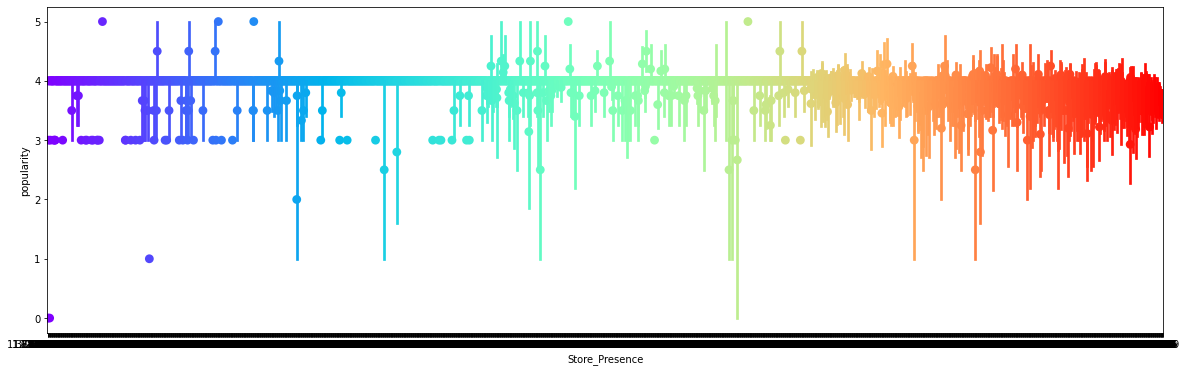

In [53]:
# Point plot between Store_presence and popularity


plt.figure(figsize=(20,6))

sns.pointplot(x='Store_Presence', y ='popularity', data=train_df, palette='rainbow')


From above pointplot

Most of the points are between 3 to 4

Very few points above 4 and below 3

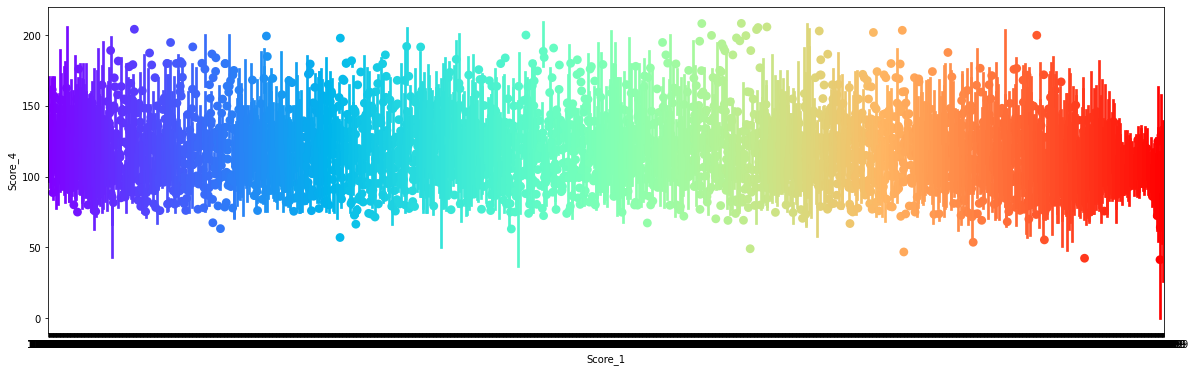

In [54]:
# Point plot between Score_1 and Score_4

plt.figure(figsize=(20,6))

sns.pointplot(x='Score_1', y ='Score_4', data=train_df, palette='rainbow')


From above pointplot

Most of the points are between 75 to 175
Very few points above 175 and below 75

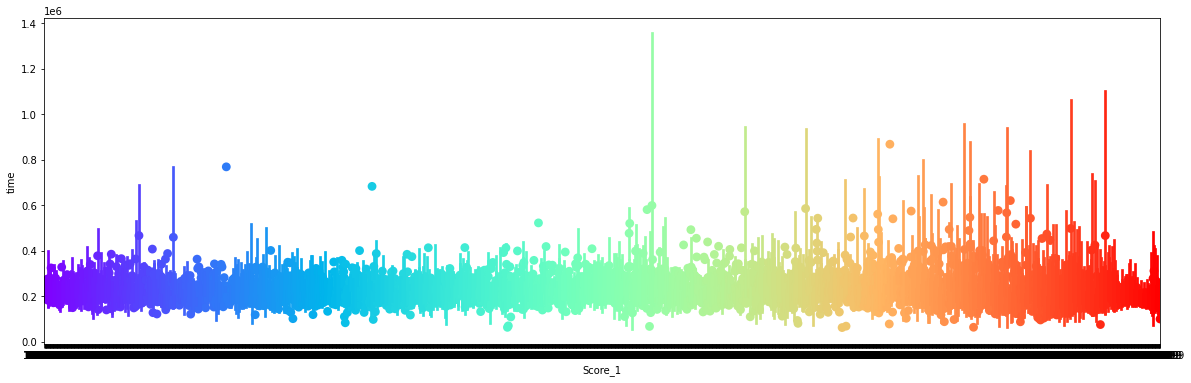

In [55]:
# Point plot between Score_1 and time

plt.figure(figsize=(20,6))

sns.pointplot(x='Score_1', y ='time', data=train_df, palette='rainbow')


From above pointplot

1. Most of the points are between 0.1 to 0.4
2. Very few points above 0.4

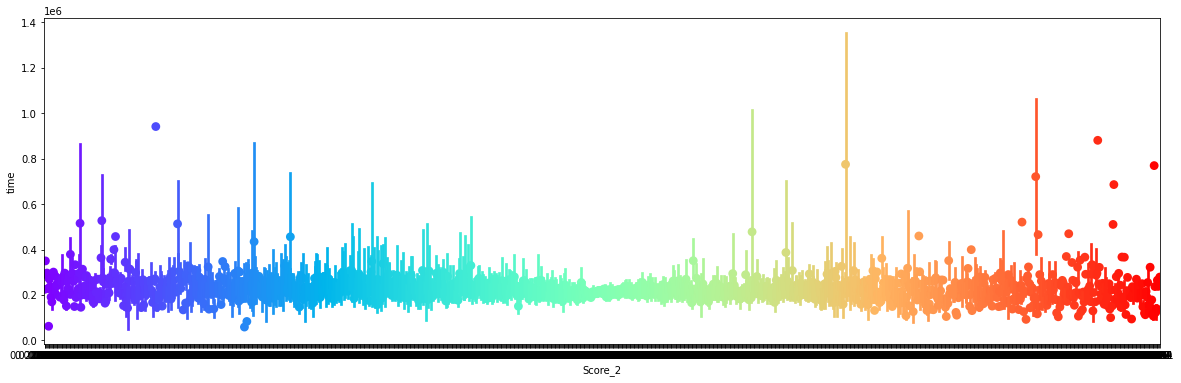

In [56]:
# Point plot between Score_2 and time

plt.figure(figsize=(20,6))

sns.pointplot(x='Score_2', y ='time', data=train_df, palette='rainbow')


From above pointplot

1. Most of the points are between 1 to 3

2. Very few points above 3

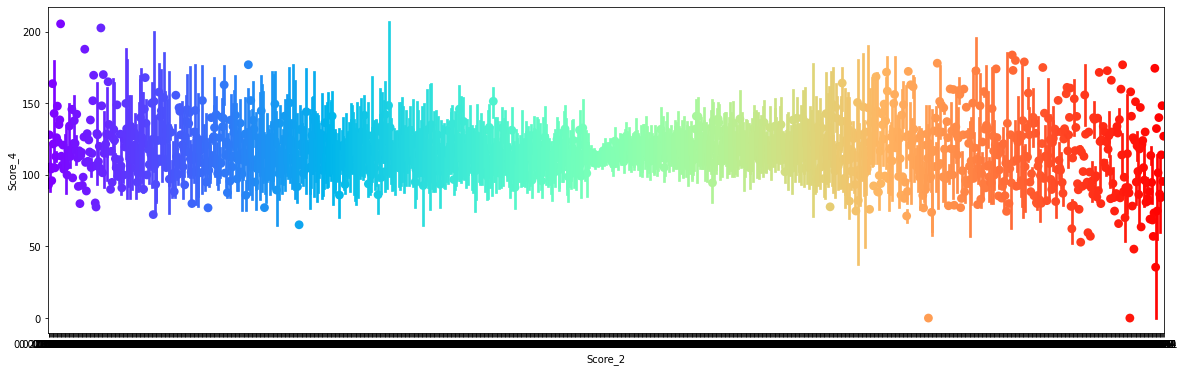

In [57]:
# Point plot between Score_2 and Score_4

plt.figure(figsize=(20,6))

sns.pointplot(x='Score_2', y ='Score_4', data=train_df, palette='rainbow')


From above pointplot

Most of the points are between 75 to 150

Very few points above 150 and below 75

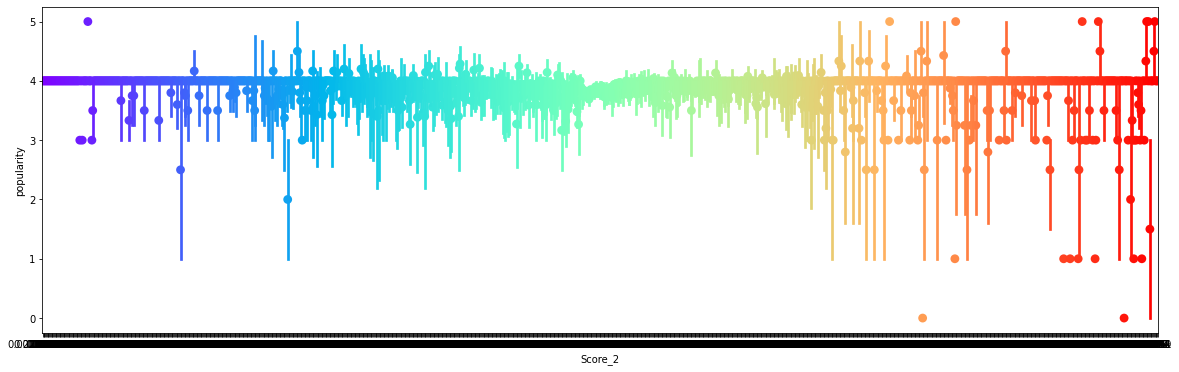

In [58]:
# Point plot between Score_2 and popularity

plt.figure(figsize=(20,6))

sns.pointplot(x='Score_2', y ='popularity', data=train_df, palette='rainbow')



From above pointplot

1. Most of the points are around 4
2. few points are between 3 and 4
3. very few are below 3

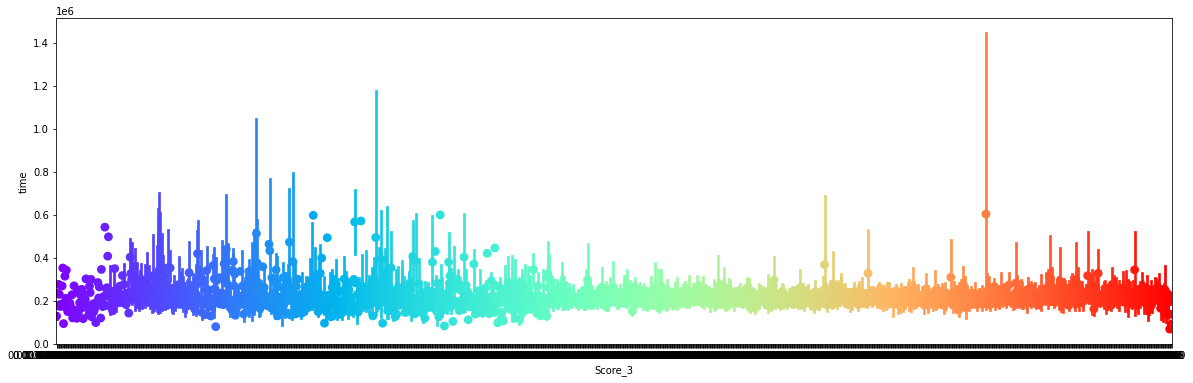

In [59]:
# Point plot between Score_3 and time

plt.figure(figsize=(20,6))

sns.pointplot(x='Score_3', y ='time', data=train_df, palette='rainbow')



From above pointplot

Most of the points are between o.0 to 0.4

Very few points above 0.4

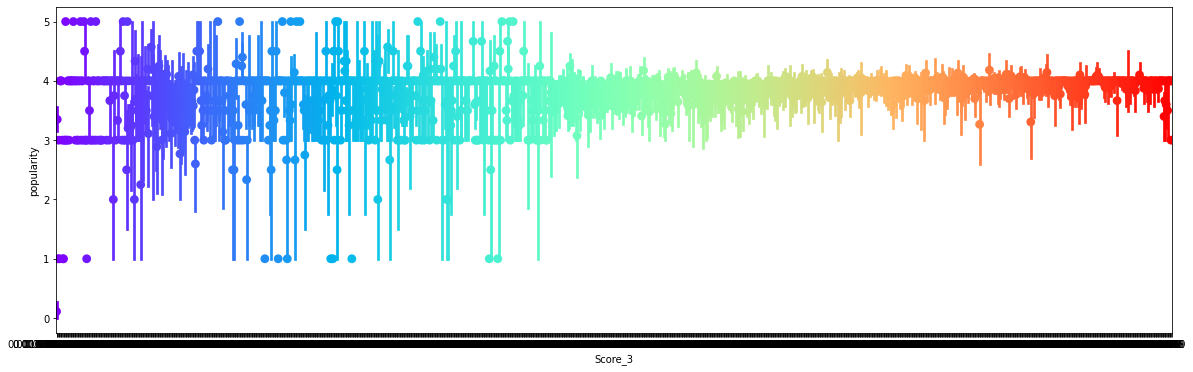

In [60]:
# Point plot between Score_3 and popularity


plt.figure(figsize=(20,6))

sns.pointplot(x='Score_3', y ='popularity', data=train_df, palette='rainbow')


From above pointplot

Most of the points are between 3 to 4

Very few points above 4 and below 3

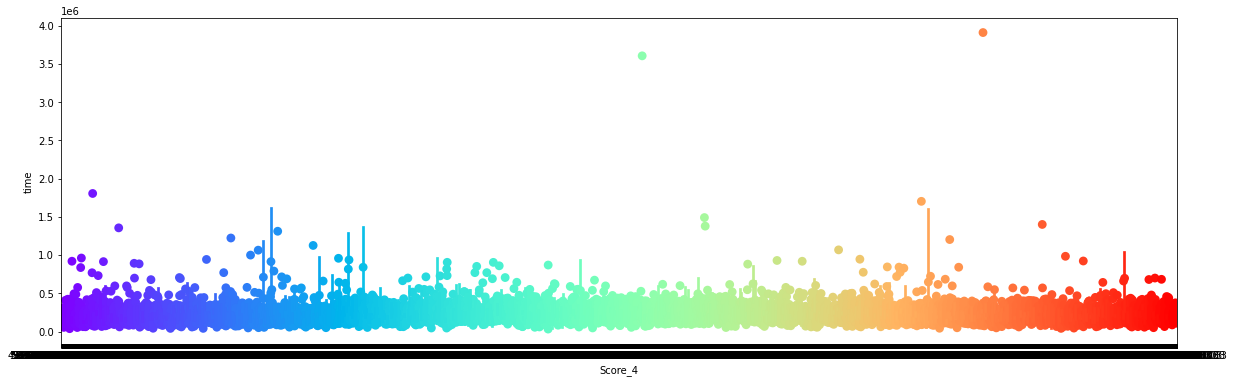

In [61]:
# Point plot between Score_4 and time

plt.figure(figsize=(20,6))

sns.pointplot(x='Score_4', y ='time', data=train_df, palette='rainbow')



From above pointplot

1. Most of the points are between o to 0.5
2. Very few points above 0.5

# DISTPLOT

The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution

Store_Ratio


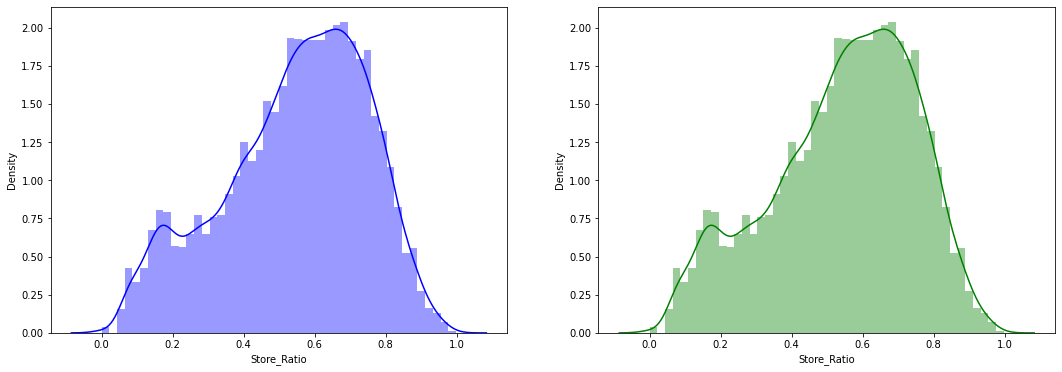

Basket_Ratio


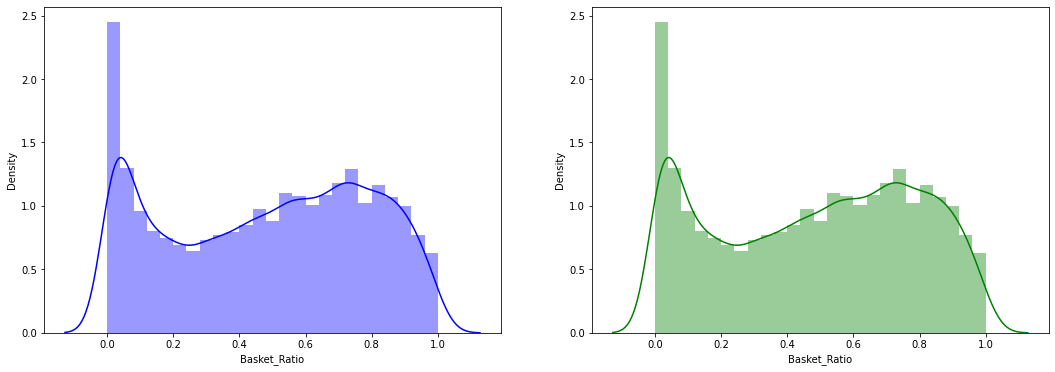

Category_1


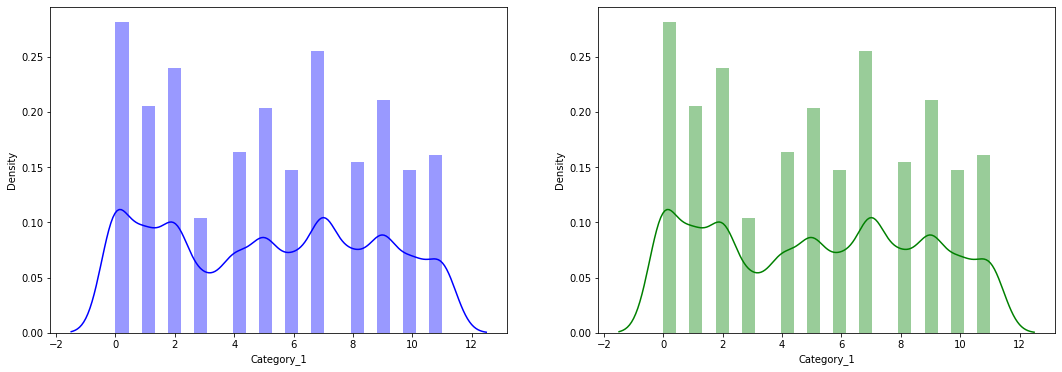

Store_Score


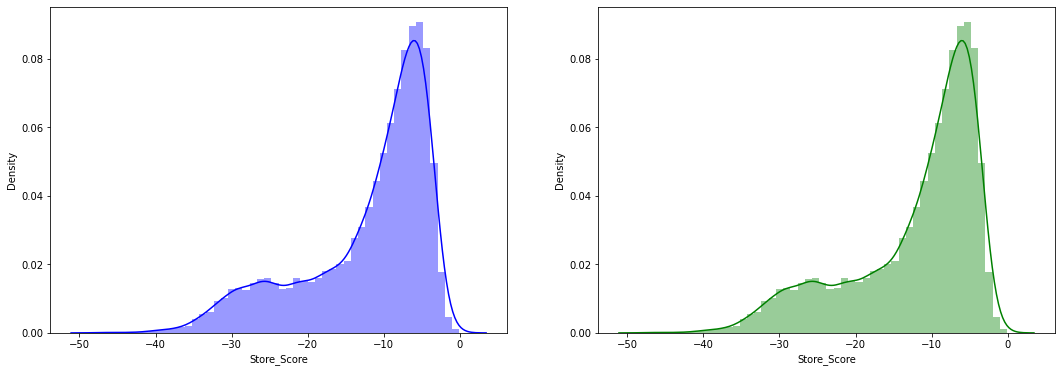

Category_2


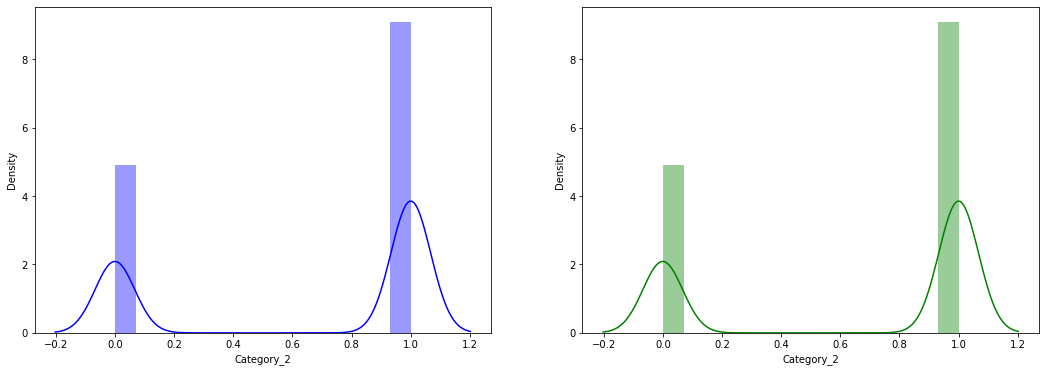

Store_Presence


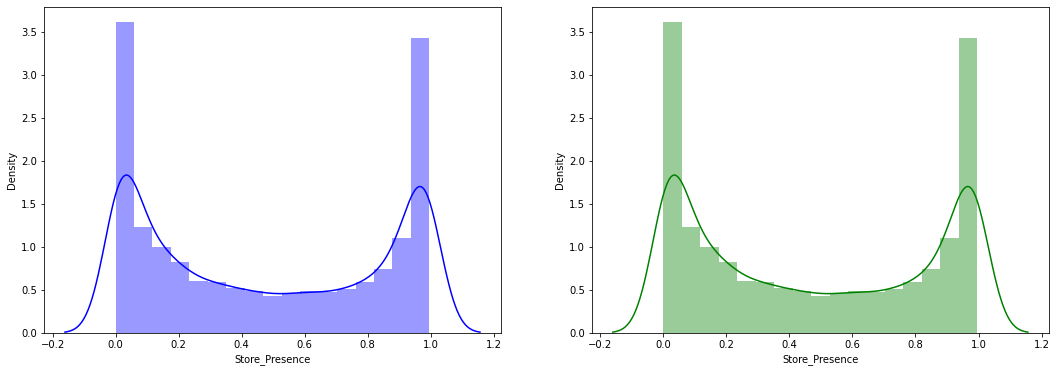

Score_1


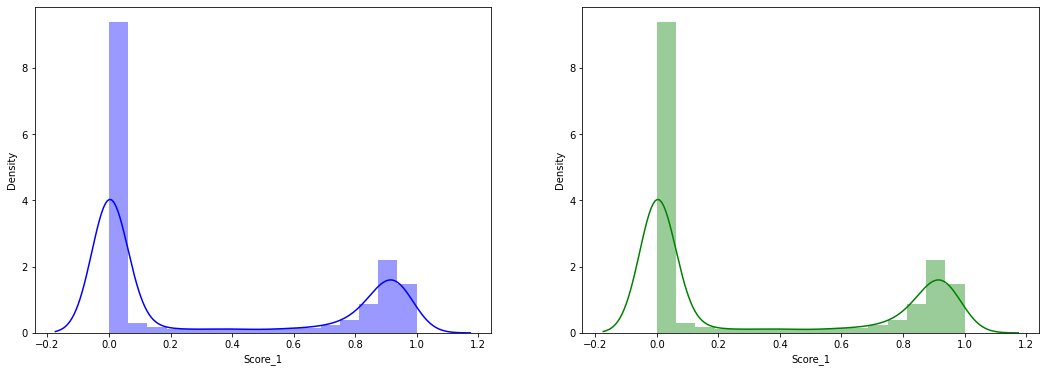

Score_2


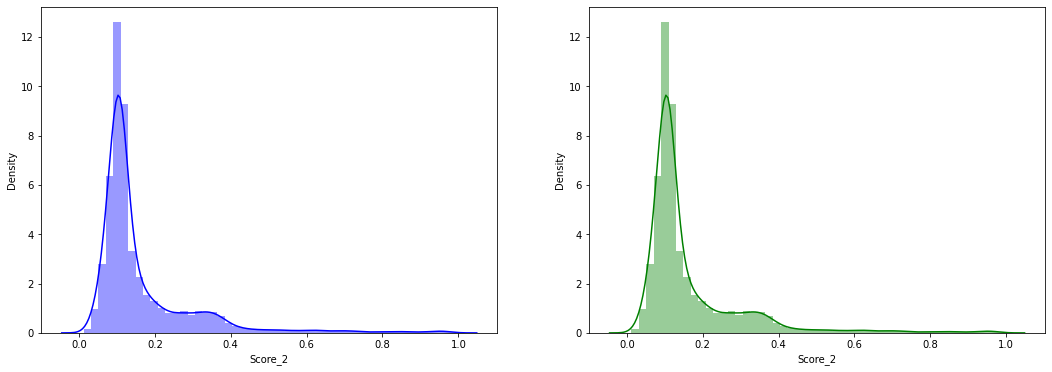

Score_3


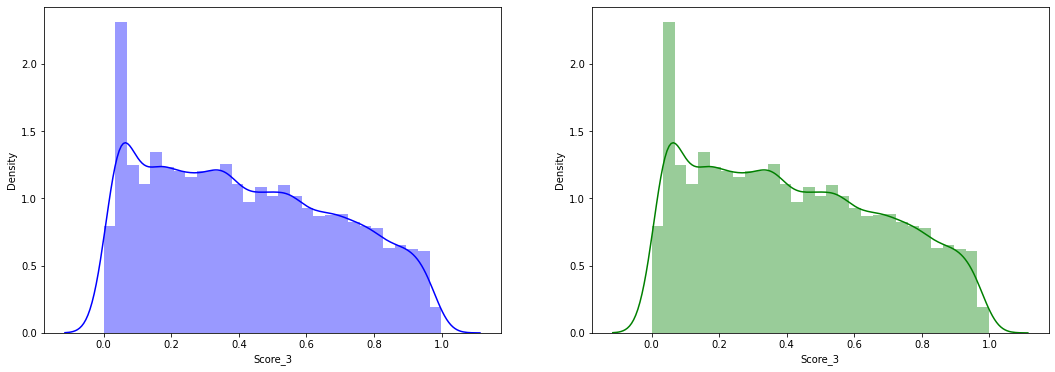

Score_4


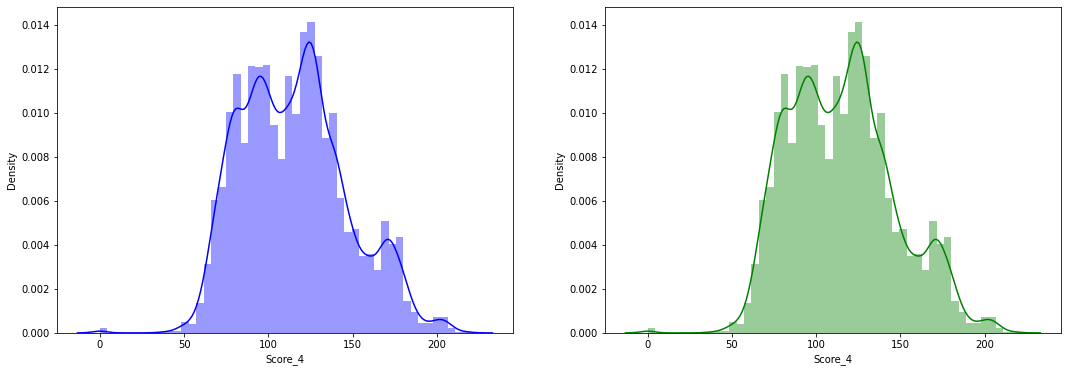

time


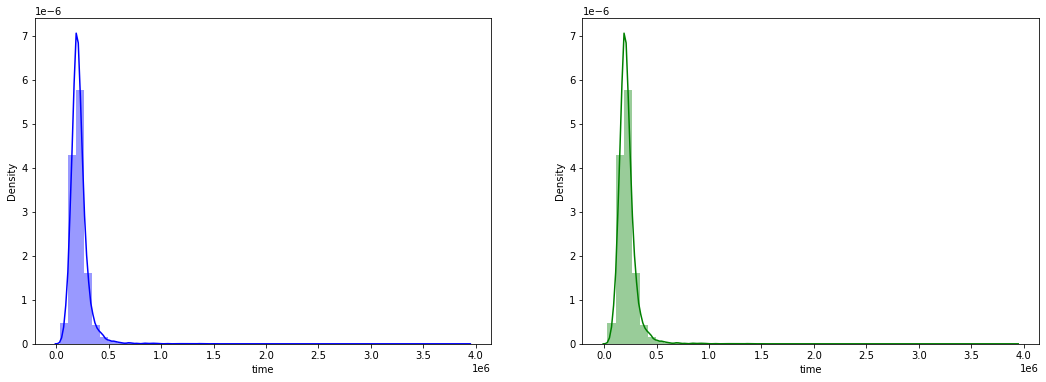

popularity


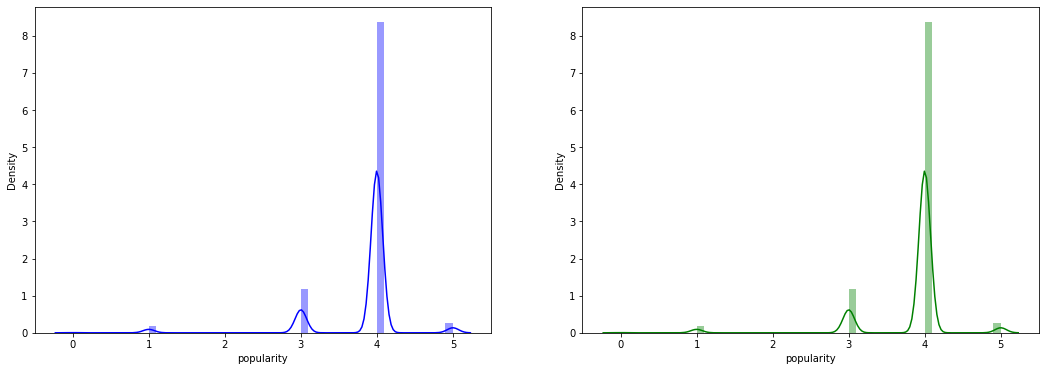

In [62]:
#Perform distplot for all the columns in dataset
for column in df.columns:
    print(column)
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    sns.distplot(df[column], ax=ax[0], color='blue')
    sns.distplot(df[column], ax=ax[1], color='green')
    plt.show()
    
    
    

OBSERVATIONS
1. distribution of store ratio, store presence, score3 and popularity are right skewed
2. distribution of basket ratio, score2 and time are skewed left
3. distribution of category 1 is multimodal
4. distribution of category2 and score1 are bimodal

# Dendrogram

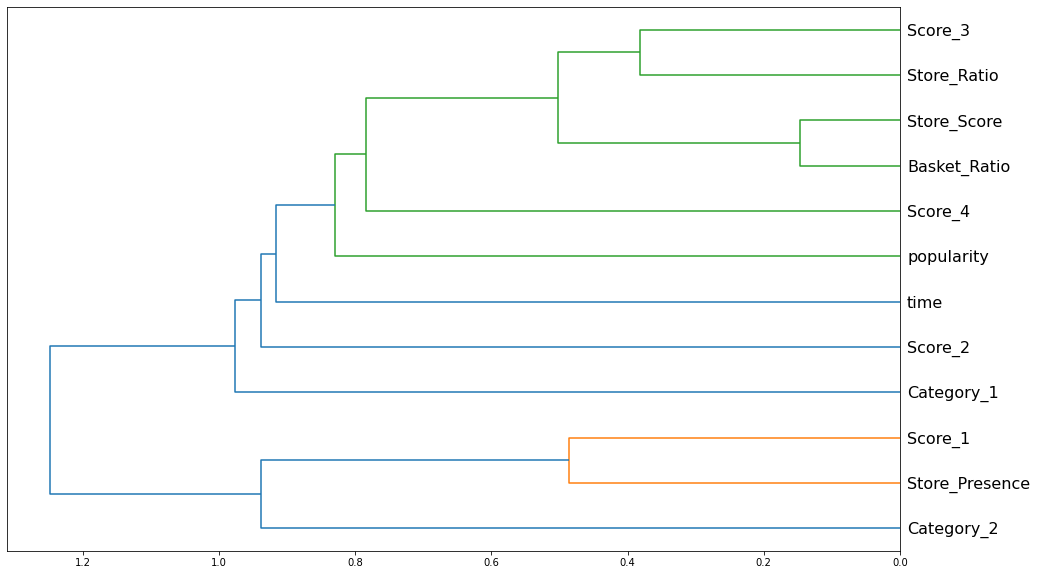

In [63]:
# Plotting a Dendrogram on the columns of the dataset

# droping the NaN values
X = train_df.dropna()

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z,labels=X.columns, orientation='left', leaf_font_size=16)
plt.show()

strongly correlated variables
1. score3 and store ratio
2. store score and basket ratio
3. score1 and store presence

# Voilin Plot

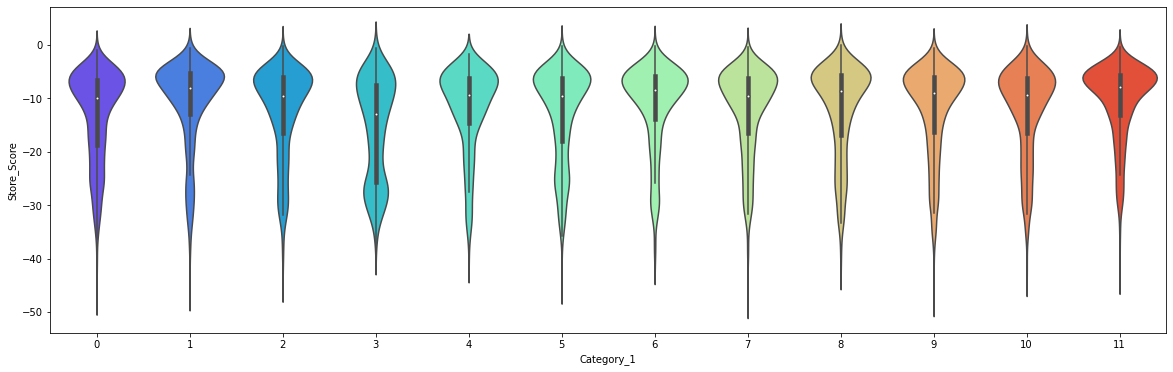

In [64]:
# Violin plot between Category_1 and Store_Score

plt.figure(figsize=(20,6))

sns.violinplot(x='Category_1', y ='Store_Score', data=train_df, palette='rainbow')


there is no relation between store score and category1

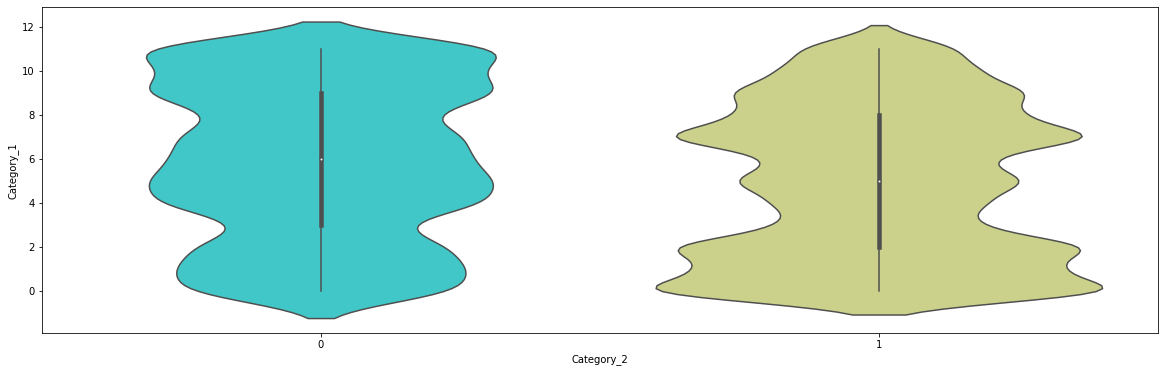

In [65]:
# Violin plot between Category_2 and Category_1

plt.figure(figsize=(20,6))

sns.violinplot(x='Category_2', y ='Category_1', data=train_df, palette='rainbow')


there is no relation between  category2 and category1

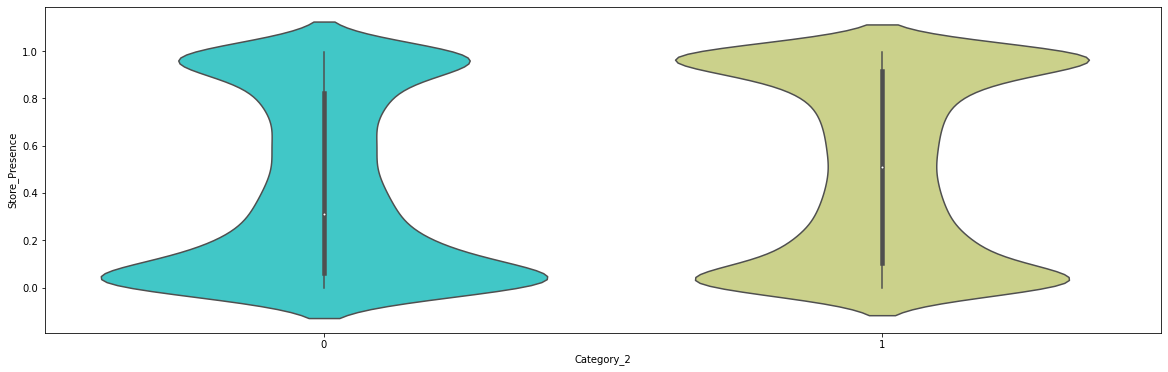

In [66]:
# Violin plot between categort_1 and Store_Presence

plt.figure(figsize=(20,6))

sns.violinplot(x='Category_2', y ='Store_Presence', data=train_df, palette='rainbow')


there is no relation between  store presence and category1

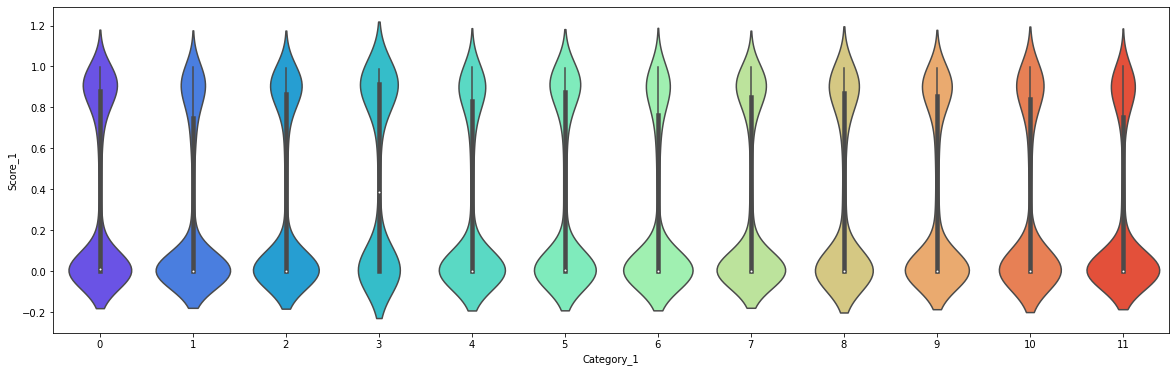

In [67]:
# Violin plot between Category_1 and Score_1

plt.figure(figsize=(20,6))

sns.violinplot(x='Category_1', y ='Score_1', data=train_df, palette='rainbow')


there is no relation between  score1 and category1

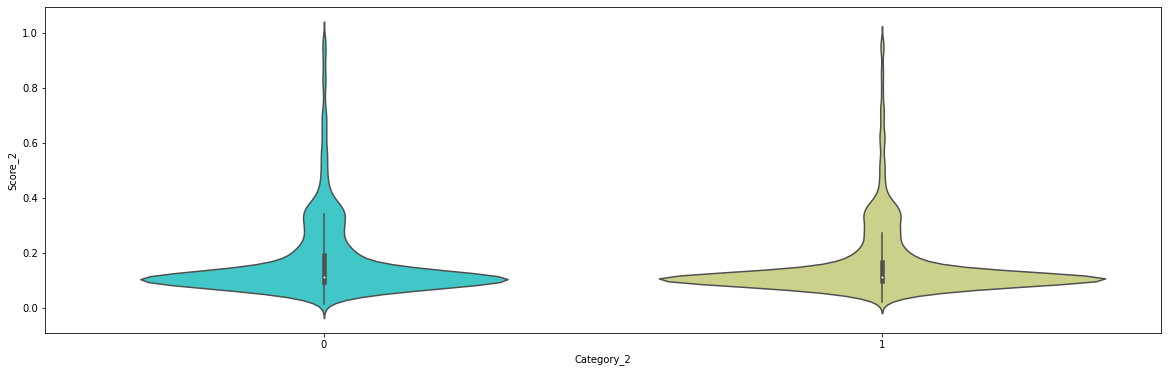

In [68]:
# Violin plot between Category_2 and Score_2 

plt.figure(figsize=(20,6))

sns.violinplot(x='Category_2', y ='Score_2', data=train_df, palette='rainbow')


there is no relation between  score2 and category1

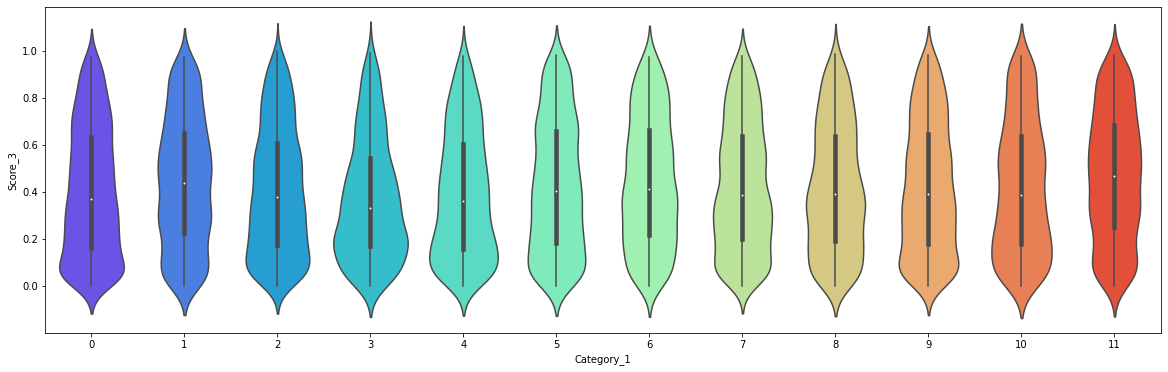

In [69]:
# Violin plot between Category_1 and Score_3

plt.figure(figsize=(20,6))

sns.violinplot(x='Category_1', y ='Score_3', data=train_df, palette='rainbow')


there is no relation between  score3 and category1

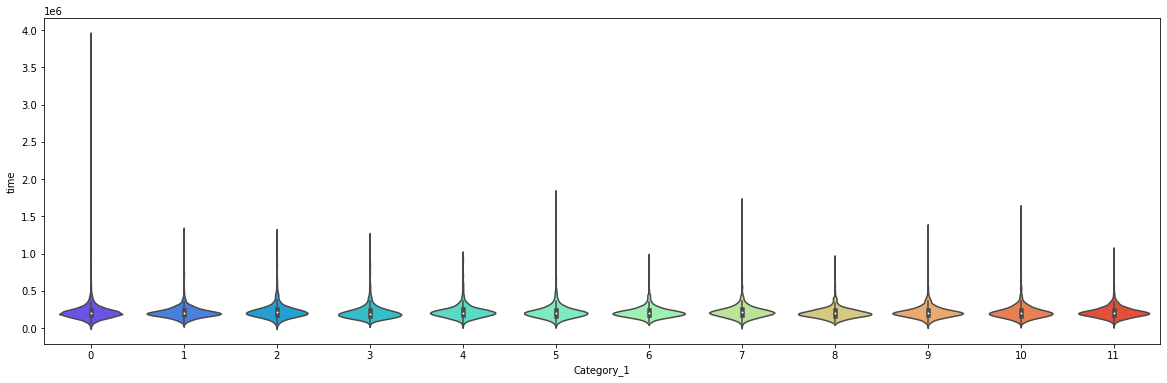

In [70]:
# Violin plot between Category_1 and time


plt.figure(figsize=(20,6))

sns.violinplot(x='Category_1', y ='time', data=train_df, palette='rainbow')


there is no relation between  time and category1

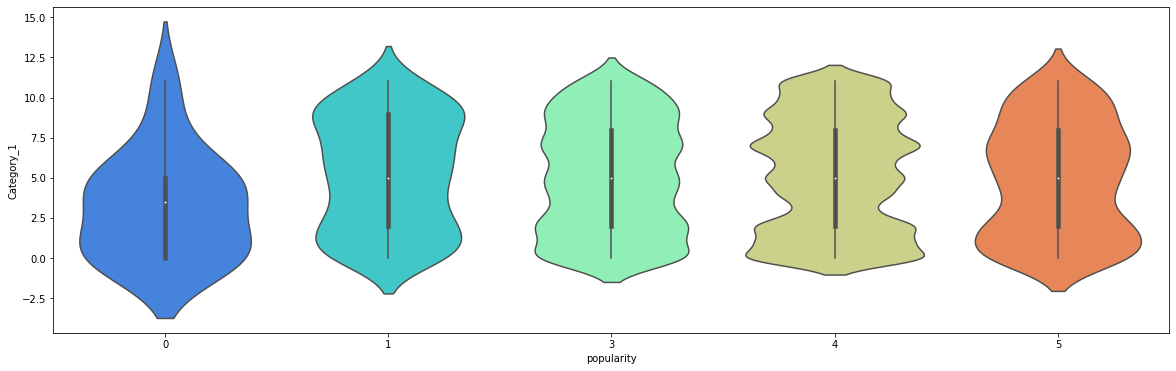

In [71]:
# Violin plot between popularity and Category_1

plt.figure(figsize=(20,6))

sns.violinplot(x='popularity', y ='Category_1', data=train_df, palette='rainbow')



there is no relation between  popularity and category1

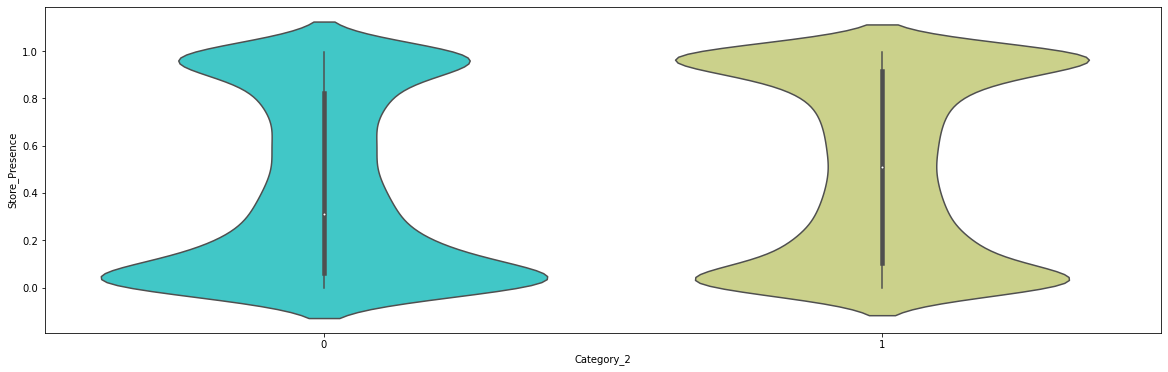

In [72]:
# Violin plot between Category_2 and Store_Presence 

plt.figure(figsize=(20,6))

sns.violinplot(x='Category_2', y ='Store_Presence', data=train_df, palette='rainbow')


there is no relation between  category2 and store presence

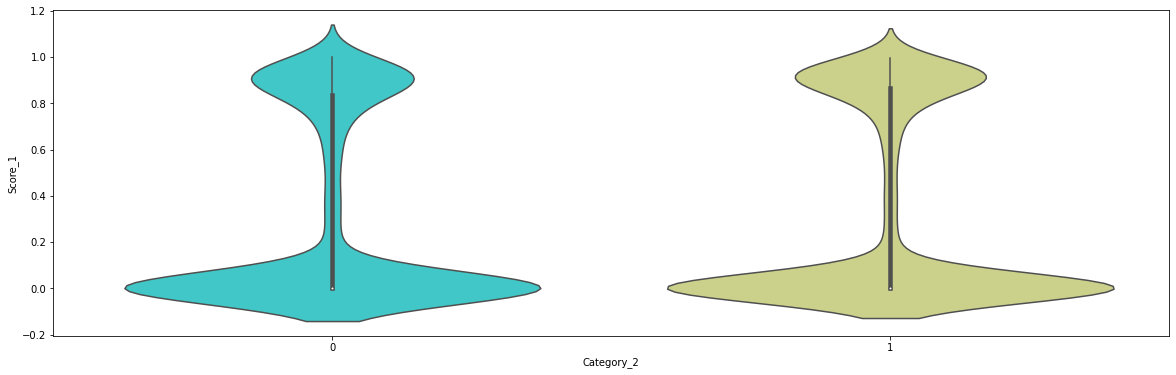

In [73]:
# Violin plot between Category_2 and Score_1


plt.figure(figsize=(20,6))

sns.violinplot(x='Category_2', y ='Score_1', data=train_df, palette='rainbow')



there is no relation between  category2 and score1

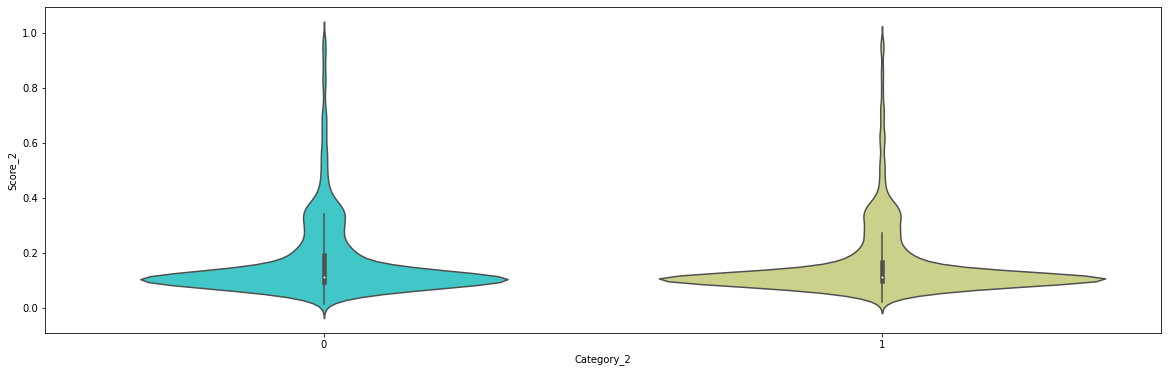

In [74]:
# Violin plot between Category_2 and Score_2

plt.figure(figsize=(20,6))

sns.violinplot(x='Category_2', y ='Score_2', data=train_df, palette='rainbow')


there is no relation between  category2 and score2

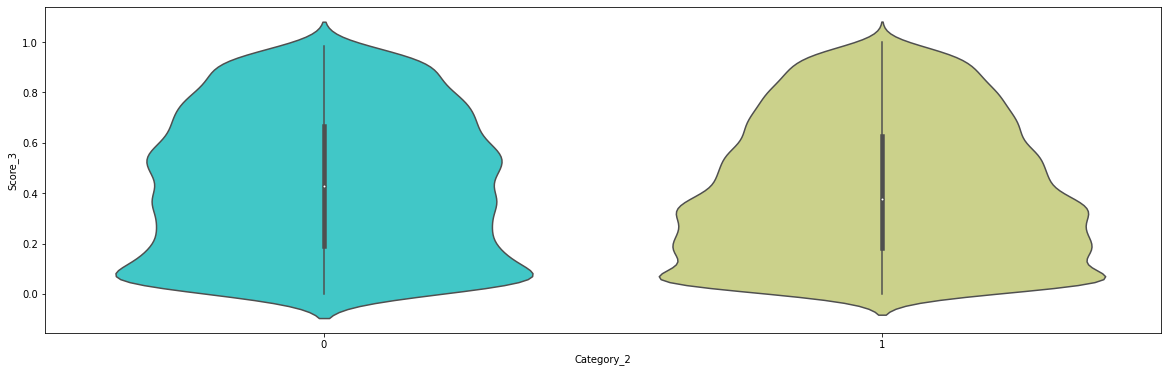

In [75]:
# Violin plot between Category_2 and Score_3

plt.figure(figsize=(20,6))

sns.violinplot(x='Category_2', y ='Score_3', data=train_df, palette='rainbow')


there is no relation between  category2 and score3

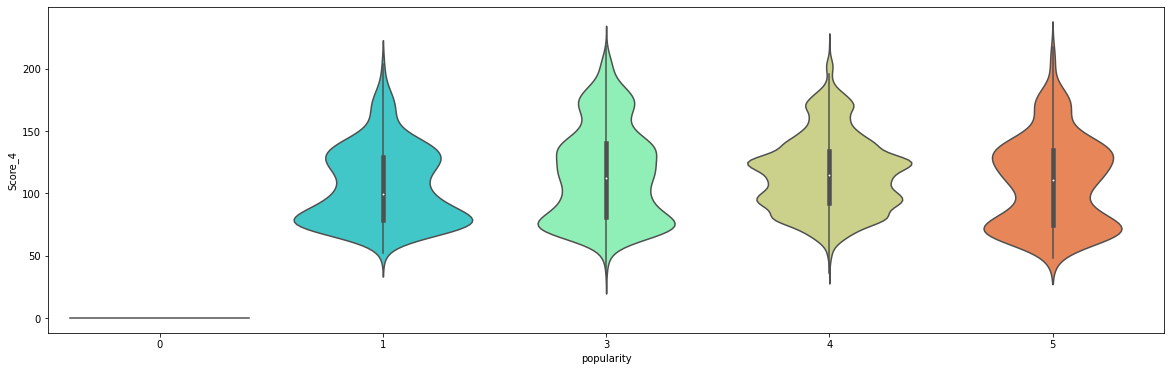

In [76]:
# Violin plot between popularity and Score_4

plt.figure(figsize=(20,6))

sns.violinplot(x='popularity', y ='Score_4', data=train_df, palette='rainbow')



there is no relation between popularity and score 4

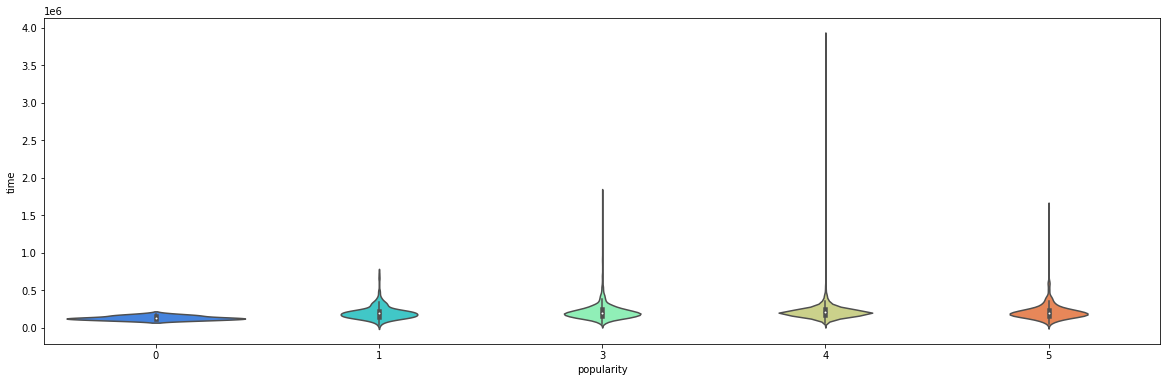

In [77]:
# Violin plot between popularity and time

plt.figure(figsize=(20,6))

sns.violinplot(x='popularity', y ='time', data=train_df, palette='rainbow')



there is on relation between time and popularity

# Preprocessing

In [78]:
#converting the time column into columns like hour, month, day, year  and minute

train_df['hour'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.hour

train_df['month'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.month

train_df['day'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.day

train_df['year'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.year

train_df['minute'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.minute



In [79]:
# dropping popularity from train_df and naming that variable as y

y = df['popularity']

train_df = df.drop(columns=['popularity', 'time'])


# Scaling

## min max scaling

In [80]:
def scale_data(df,col):
  from numpy import asarray
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [81]:
# Making a list of the column names to be scaled 

# passing data and column name for scaling
col_X = ['Store_Ratio', 'Basket_Ratio', 'Store_Score', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3', 'Score_4']

X = train_df     
X = scale_data(train_df, col_X)

## Splitting the data into train and test set

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [83]:
# printing X_train shape, y_train shape

print(X_train.shape)
print(y_train.shape)

(14566, 15)
(14566,)


In [84]:
# check for nan value in X_train
np.any(np.isnan(X_train))

False

# Modelling

In [85]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Function for calculating all the relevant metrics 
def print_score(m):
    res = classification_report(y_test, m.predict(X_test))
    print("Classification Report \n",res)

In [86]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
  feature_importance_df = pd.DataFrame()

  _df = pd.DataFrame()
  _df['feature_importance'] = feature_importances
  _df['column'] = feat_train_df.columns
  feature_importance_df = pd.concat([feature_importance_df, _df], 
                                    axis=0, ignore_index=True)
  


  # grouping all data and sorting in descending order
  order = feature_importance_df.groupby('column')\
      .sum()[['feature_importance']]\
      .sort_values('feature_importance', ascending=False).index[:50]

  # ploting feature importance data using boxenplot
  fig, ax = plt.subplots(figsize=(8, max(6, len(order)* .25)))
  sns.boxenplot(data=feature_importance_df, x='feature_importance', y='column', order=order, ax=ax, palette='viridis', orient='h')
  ax.tick_params(axis='x', rotation =0)
  ax.set_title('Importance')
  ax.grid()
  fig.tight_layout()

  return fig, ax


# LOGISTIC REGRESSION

Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        74
           3       0.22      0.01      0.02       444
           4       0.83      1.00      0.91      3030
           5       0.00      0.00      0.00        91

    accuracy                           0.83      3642
   macro avg       0.21      0.20      0.19      3642
weighted avg       0.72      0.83      0.76      3642

CPU times: user 1.17 s, sys: 790 ms, total: 1.96 s
Wall time: 1.02 s


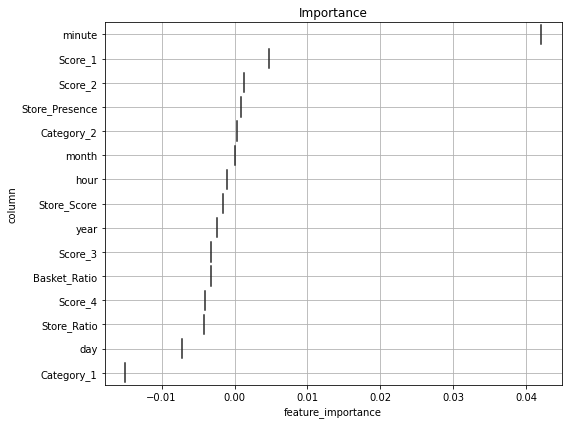

In [87]:
%%time
# Fitting a logistic Regression model to the train dataset

from sklearn.linear_model import LogisticRegression

log_class = LogisticRegression()

log_class.fit(X_train, y_train)

print_score(log_class)


fig, ax = visualize_importance(log_class.coef_[0], X)



# RANDOM FOREST CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.35      0.52        74
           3       0.84      0.32      0.47       444
           4       0.88      0.99      0.93      3030
           5       1.00      0.32      0.48        91

    accuracy                           0.88      3642
   macro avg       0.94      0.60      0.68      3642
weighted avg       0.88      0.88      0.86      3642

CPU times: user 2.81 s, sys: 14.1 ms, total: 2.83 s
Wall time: 2.83 s


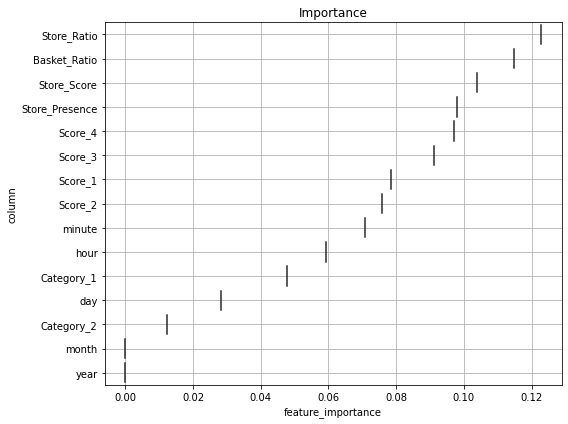

In [88]:
%%time
# Fitting a RandomForestClassifier model to the train dataset

from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

print_score(rf_clf)

fig, ax = visualize_importance(rf_clf.feature_importances_, X)


# ADA BOOST CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.01      0.18      0.01        74
           3       0.00      0.00      0.00       444
           4       0.69      0.34      0.45      3030
           5       0.00      0.00      0.00        91

    accuracy                           0.29      3642
   macro avg       0.34      0.30      0.29      3642
weighted avg       0.57      0.29      0.38      3642

CPU times: user 1.03 s, sys: 8.44 ms, total: 1.04 s
Wall time: 1.04 s


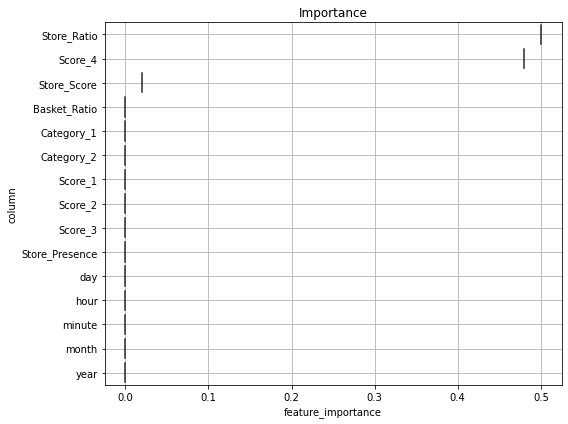

In [89]:
%%time
# Fit a AdaBoost classifier model to the train dataset
from sklearn.ensemble import AdaBoostClassifier

Ada_clf = AdaBoostClassifier()

Ada_clf.fit(X_train, y_train)

print_score(Ada_clf)

fig, ax = visualize_importance(Ada_clf.feature_importances_, X)



# SUPORT VECTOR CLASSIFIER

In [90]:
%%time
# Fitting a support vector classifier model to the train dataset
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

print_score(svc)


Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        74
           3       0.00      0.00      0.00       444
           4       0.83      1.00      0.91      3030
           5       0.00      0.00      0.00        91

    accuracy                           0.83      3642
   macro avg       0.17      0.20      0.18      3642
weighted avg       0.69      0.83      0.76      3642

CPU times: user 3.76 s, sys: 110 ms, total: 3.87 s
Wall time: 3.85 s


# DESISION TREE CLASSICIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.32      0.36      0.34        74
           3       0.46      0.47      0.47       444
           4       0.91      0.89      0.90      3030
           5       0.29      0.36      0.32        91

    accuracy                           0.82      3642
   macro avg       0.60      0.62      0.61      3642
weighted avg       0.83      0.82      0.82      3642

CPU times: user 258 ms, sys: 1.42 ms, total: 259 ms
Wall time: 257 ms


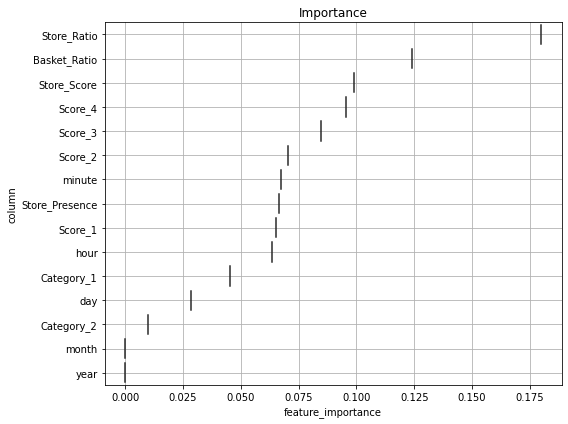

In [91]:
%%time
# Fitting a DecisionTreeClassifier model to the train dataset

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

print_score(dt_clf)

fig, ax = visualize_importance(dt_clf.feature_importances_, X)

# K NEIGHBOUR CLASSIFIER

In [92]:
%%time
# Fitting a K-Neighbor classifier model to the train dataset

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

print_score(knn_clf)


Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.23      0.04      0.07        74
           3       0.37      0.15      0.21       444
           4       0.85      0.96      0.90      3030
           5       0.43      0.10      0.16        91

    accuracy                           0.82      3642
   macro avg       0.38      0.25      0.27      3642
weighted avg       0.77      0.82      0.78      3642

CPU times: user 165 ms, sys: 415 µs, total: 166 ms
Wall time: 171 ms


# GRADIENT BOOSTING CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.63      0.16      0.26        74
           3       0.55      0.11      0.18       444
           4       0.85      0.99      0.91      3030
           5       0.75      0.13      0.22        91

    accuracy                           0.84      3642
   macro avg       0.76      0.48      0.52      3642
weighted avg       0.81      0.84      0.79      3642

CPU times: user 20.1 s, sys: 951 µs, total: 20.1 s
Wall time: 20 s


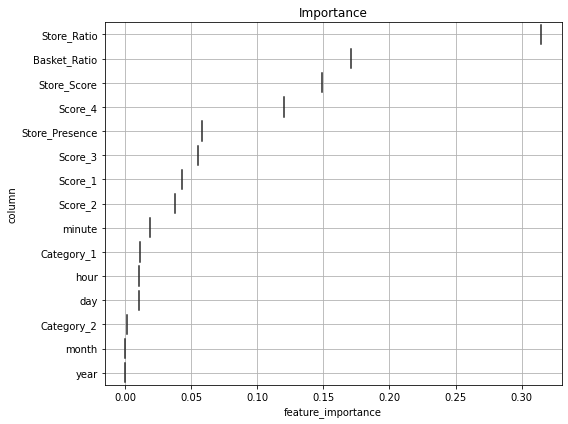

In [93]:
%%time
# Fitting a Gradient Boosting Classifier model to the train dataset

from sklearn.ensemble import GradientBoostingClassifier

GBR_clf = GradientBoostingClassifier()

GBR_clf.fit(X_train, y_train)

print_score(GBR_clf)

fig, ax = visualize_importance(GBR_clf.feature_importances_, X)

# BAGGING CLASSIFIER

In [94]:
%%time
# Fitting a Bagging Classifier model to the train dataset

from sklearn.ensemble import BaggingClassifier

bg_clf = BaggingClassifier()

bg_clf.fit(X_train, y_train)

print_score(bg_clf)


Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.86      0.34      0.49        74
           3       0.54      0.40      0.46       444
           4       0.89      0.96      0.92      3030
           5       0.93      0.31      0.46        91

    accuracy                           0.86      3642
   macro avg       0.85      0.60      0.67      3642
weighted avg       0.85      0.86      0.85      3642

CPU times: user 1.21 s, sys: 1.69 ms, total: 1.22 s
Wall time: 1.21 s


# VOTING CLASSIFIER

In [95]:
%%time
# Fitting a VotingClassifier model to the train dataset

from sklearn.ensemble import VotingClassifier

classifiers = [("knn", knn_clf), ("svc", svc), ("dt", dt_clf), ("rf_clf", rf_clf)]

voting_clf = VotingClassifier(estimators=classifiers, voting='hard')

voting_clf.fit(X_train, y_train)

print_score(voting_clf)


Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.35      0.52        74
           3       0.84      0.31      0.45       444
           4       0.87      0.99      0.93      3030
           5       1.00      0.11      0.20        91

    accuracy                           0.87      3642
   macro avg       0.94      0.55      0.62      3642
weighted avg       0.88      0.87      0.85      3642

CPU times: user 7.5 s, sys: 36.3 ms, total: 7.54 s
Wall time: 7.55 s


# XGB CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.83      0.07      0.13        74
           3       0.53      0.06      0.11       444
           4       0.84      0.99      0.91      3030
           5       1.00      0.01      0.02        91

    accuracy                           0.84      3642
   macro avg       0.84      0.43      0.43      3642
weighted avg       0.81      0.84      0.78      3642

CPU times: user 3.4 s, sys: 25 ms, total: 3.42 s
Wall time: 3.56 s


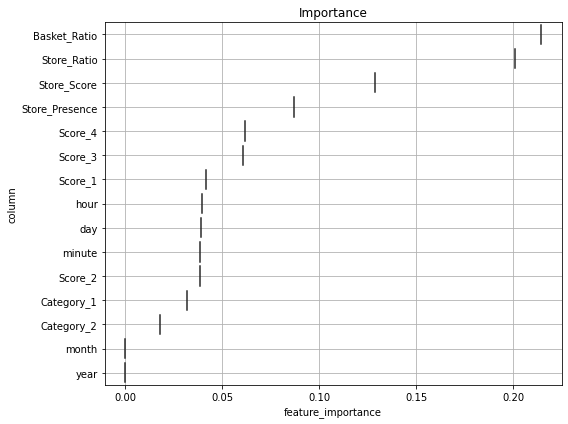

In [96]:
%%time
# Fitting a XGBClassifier model to the train dataset

from xgboost import XGBClassifier

xgb_clf = XGBClassifier()

xgb_clf.fit(X_train, y_train)

print_score(xgb_clf)

fig, ax = visualize_importance(xgb_clf.feature_importances_, X)



## Comparing all the model based on metric

In [97]:
def compare_models(models,names,X_train,y_train,X_test,y_test):
  import sklearn.metrics as metrics 
  from sklearn.model_selection import train_test_split 

  for (model,name) in zip(models,names):
    print(name)
    y_pred =  model.predict(X_test)
    res = classification_report(y_test, y_pred)
    print("Classification Report \n",res)
    print("---------------------------------------------------------------------------------------")
  

In [98]:
models= [log_class,rf_clf,Ada_clf,svc, dt_clf, knn_clf, GBR_clf,bg_clf, voting_clf, xgb_clf ]
names = ['logistic', 'rf','AdaBoost', 'svc', 'Dtree','KNN','GBR','bagging','voting','XGB']

compare_models(models,names,X_train,y_train, X_test, y_test)



logistic
Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        74
           3       0.22      0.01      0.02       444
           4       0.83      1.00      0.91      3030
           5       0.00      0.00      0.00        91

    accuracy                           0.83      3642
   macro avg       0.21      0.20      0.19      3642
weighted avg       0.72      0.83      0.76      3642

---------------------------------------------------------------------------------------
rf
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.35      0.52        74
           3       0.84      0.32      0.47       444
           4       0.88      0.99      0.93      3030
           5       1.00      0.32      0.48        91

    accuracy                         

# Hyperparameter tuning

# grid search

In [99]:
%%time
# Function to perform hyper parameter tunning with GridSearchCV
def grid_search(model,grid):
  from sklearn.model_selection import GridSearchCV, train_test_split
  from sklearn.model_selection import KFold
  from sklearn.model_selection import GridSearchCV

  
  cv = KFold(n_splits=5, shuffle=False, random_state=None)

  clf = GridSearchCV(model, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
  
  clf.fit(X_train, y_train)
  print(clf.score(X_train, y_train))
  print(clf.best_params_)
 
 

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs


In [100]:
%%time
# creating  parameters dict in list for tunning
log_para_grid = {
    'C':10.0 **np.arange(-2,3),
    'penalty':['l1','l2']
    }

grid_search(log_class, log_para_grid) 


0.18859601500979314
{'C': 1.0, 'penalty': 'l2'}
CPU times: user 1.57 s, sys: 985 ms, total: 2.55 s
Wall time: 13 s


# RamdomizedSearchCV

In [101]:
# Function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV
  random = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, verbose=2, random_state=42)
  random.fit(X_train, y_train)
  print(random.best_params_)
  

In [102]:
%%time
# creating parameters dict for tunning
rf_para_grid = {'n_estimators': list(range(150, 301, 50)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3, 10, num = 3)],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

random_Search(RandomForestClassifier(), X_train, y_train, param_grid=rf_para_grid )


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.9s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total tim

In [103]:
%%time
# create parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [x for x in range(200,351, 50)], 
 'learning_rate' : [0.01, 0.1, 0.2],
 'max_depth': [x for x in range(5,7)], 
 'min_samples_split': [x for x in range(2,6)]
}

random_Search(GradientBoostingClassifier(), X_train, y_train, param_grid=GBR_para_grid)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.2, max_depth=6, min_samples_split=2, n_estimators=200; total time=  44.2s
[CV] END learning_rate=0.2, max_depth=6, min_samples_split=2, n_estimators=200; total time=  44.4s
[CV] END learning_rate=0.2, max_depth=6, min_samples_split=2, n_estimators=200; total time=  44.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=250; total time=  46.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=250; total time=  45.8s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=5, n_estimators=250; total time=  46.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=4, n_estimators=250; total time=  45.8s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=4, n_estimators=250; total time=  45.8s
[CV] END learning_rate=0.2, max_depth=5, min_samples_split=4, n_estimators=250; total time=  45.6s
[CV] END learning_rate=0.2, max_depth=6, min_sam

In [104]:
%%time
# create parameters dict for tunning
knn_para_grid = {
                  'leaf_size' :list(range(3,15,2)),
                  'n_neighbors' : list(range(10,30))
              }

random_Search(KNeighborsClassifier(), X_train, y_train, param_grid=knn_para_grid)




Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ........................leaf_size=7, n_neighbors=14; total time=   0.2s
[CV] END ........................leaf_size=7, n_neighbors=14; total time=   0.2s
[CV] END ........................leaf_size=7, n_neighbors=14; total time=   0.2s
[CV] END ........................leaf_size=7, n_neighbors=17; total time=   0.2s
[CV] END ........................leaf_size=7, n_neighbors=17; total time=   0.2s
[CV] END ........................leaf_size=7, n_neighbors=17; total time=   0.2s
[CV] END ........................leaf_size=3, n_neighbors=14; total time=   0.3s
[CV] END ........................leaf_size=3, n_neighbors=14; total time=   0.3s
[CV] END ........................leaf_size=3, n_neighbors=14; total time=   0.3s
[CV] END ........................leaf_size=7, n_neighbors=25; total time=   0.3s
[CV] END ........................leaf_size=7, n_neighbors=25; total time=   0.3s
[CV] END ........................leaf_size=7, n_

In [105]:
%%time
# create  parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : [3,5,7,9],
           "min_samples_leaf":[1,2,3,4],
           "max_features":["auto","log2","sqrt"]
              }

random_Search(DecisionTreeClassifier(), X_train, y_train, param_grid=DTR_para_grid)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=be

In [106]:
%%time
# create  parameters dict for tunning
Ada_para_grid = {
                  'n_estimators' :[100, 200, 300],
                  'learning_rate' : [0.001, 0.01, 0.1, 1.0]
              }

random_Search(AdaBoostClassifier(), X_train, y_train, param_grid=Ada_para_grid)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................learning_rate=1.0, n_estimators=200; total time=   2.8s
[CV] END ................learning_rate=1.0, n_estimators=200; total time=   2.9s
[CV] END ................learning_rate=1.0, n_estimators=200; total time=   2.8s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   1.4s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   1.4s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   1.4s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   1.4s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   1.5s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   1.5s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   4.2s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   4.3s
[CV] END ................learning_rate=0.1, n_es

In [107]:
%%time
# create  parameters dict for tunning
XGB_para_grid = {"learning_rate"    : [0.05, 0.10] ,
 "max_depth"        : [ 3, 4, 5],
 "min_child_weight" : [ 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1],
 "colsample_bytree" : [ 0.3, 0.4] }

random_Search(XGBClassifier(), X_train, y_train, param_grid=Ada_para_grid)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................learning_rate=1.0, n_estimators=200; total time=   4.4s
[CV] END ................learning_rate=1.0, n_estimators=200; total time=   4.7s
[CV] END ................learning_rate=1.0, n_estimators=200; total time=   4.4s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   2.2s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   2.2s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   2.2s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   2.2s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   2.2s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   2.2s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   6.6s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   6.6s
[CV] END ................learning_rate=0.1, n_es

# Using the tuned parameters and training the models

## Gradient Boosting Classifier

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.82      0.38      0.52        74
           3       0.67      0.33      0.44       444
           4       0.88      0.98      0.93      3030
           5       0.76      0.31      0.44        91

    accuracy                           0.87      3642
   macro avg       0.83      0.60      0.67      3642
weighted avg       0.85      0.87      0.85      3642

CPU times: user 1min 25s, sys: 95.6 ms, total: 1min 25s
Wall time: 1min 25s


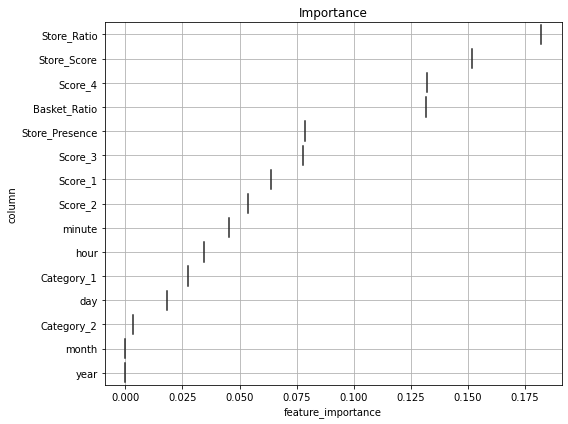

In [108]:
%%time

GBR_clf = GradientBoostingClassifier(**{'n_estimators': 300, 'min_samples_split': 4, 'max_depth': 5, 'learning_rate': 0.1})

GBR_clf.fit(X_train, y_train)

print_score(GBR_clf)

fig, ax = visualize_importance(GBR_clf.feature_importances_, X)



## Random Forest Classifier

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.07      0.13        74
           3       0.92      0.08      0.15       444
           4       0.84      1.00      0.92      3030
           5       1.00      0.10      0.18        91

    accuracy                           0.85      3642
   macro avg       0.95      0.45      0.47      3642
weighted avg       0.86      0.85      0.79      3642

CPU times: user 5.54 s, sys: 15.8 ms, total: 5.56 s
Wall time: 5.53 s


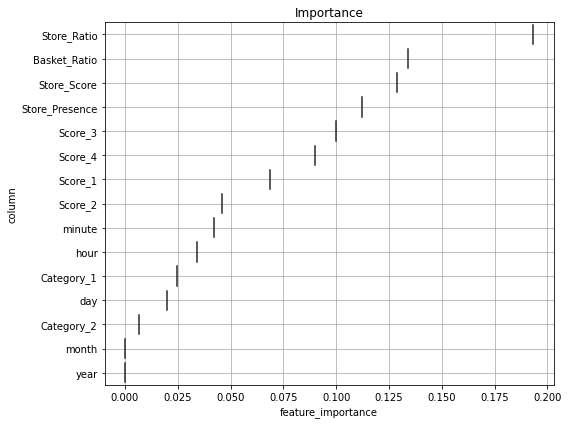

In [109]:
%%time

rf_clf = RandomForestClassifier(**{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False})

rf_clf.fit(X_train, y_train)

print_score(rf_clf)

fig, ax = visualize_importance(rf_clf.feature_importances_, X)

## Adaboost Classifier

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00        74
           3       0.00      0.00      0.00       444
           4       0.83      1.00      0.91      3030
           5       0.00      0.00      0.00        91

    accuracy                           0.83      3642
   macro avg       0.37      0.40      0.38      3642
weighted avg       0.69      0.83      0.76      3642

CPU times: user 5.97 s, sys: 44.5 ms, total: 6.02 s
Wall time: 6.01 s


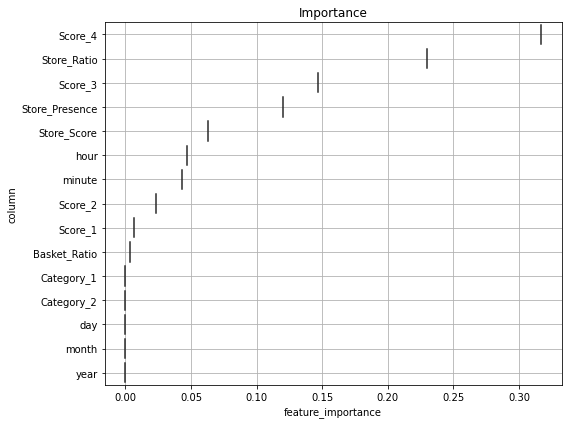

In [110]:
%%time


Ada_clf = AdaBoostClassifier(**{'n_estimators': 300, 'learning_rate': 0.01})

Ada_clf.fit(X_train, y_train)

print_score(Ada_clf)

fig, ax = visualize_importance(Ada_clf.feature_importances_, X)



### Now working with the test dataset provided

In [111]:
# preparing test data as similarly as done for train data before.
test_df['hour'] = pd.to_datetime(test_df['time'].astype(int), unit='s').dt.hour

test_df['month'] = pd.to_datetime(test_df['time'].astype(int), unit='s').dt.month

test_df['day'] = pd.to_datetime(test_df['time'].astype(int), unit='s').dt.day

test_df['year'] = pd.to_datetime(test_df['time'].astype(int), unit='s').dt.year

test_df['minute'] = pd.to_datetime(test_df['time'].astype(int), unit='s').dt.minute

test_df = test_df.drop(columns=['time'])


In [112]:
X_test = test_df

In [113]:
test_df.columns

Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'hour', 'month', 'day', 'year', 'minute'],
      dtype='object')

In [114]:
# passing test data for scaling
col_X_test = ['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4']

X_test = scale_data(test_df, col_X_test)



In [115]:
# Perforn the prediction on the test dataset
y_predicted = voting_clf.predict(X_test)


y_predicted

array([4, 4, 4, ..., 4, 4, 4])

In [116]:
# creating a dataframe of predicted results 

predictions = pd.DataFrame(y_predicted)


In [117]:
# predicted values in dataframe

predictions.head()

,0
0,4
1,4
2,4
3,4
4,4


### CONCLUSION

Performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.

Store ratio is the most important data in the dataset and used  voting classifier for prediction